In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_test = pd.read_csv("Data/national/tested_numbers_icmr_data.csv")
df_test = df_test.dropna(subset=['Tested_As_Of' , 'RTPCR'])

In [3]:
df_test.drop(df_test.columns.difference(['Tested_As_Of' , 'RTPCR']), 1, inplace=True)

df_test['Tested_As_Of'] = pd.to_datetime(df_test['Tested_As_Of'], format='%d/%m/%Y')
df_test["month_year"]=0

for i in df_test.index:
    df_test["month_year"][i] = str(df_test["Tested_As_Of"][i].month) +"-"+ str(df_test["Tested_As_Of"][i].year)

df_test=df_test.drop(columns=["Tested_As_Of"])

df_test_ = df_test.groupby("month_year").sum()
df_test_ = df_test_.reset_index(level=0)


/var/folders/t9/07dkzgf117b69lnz9s626dqw0000gn/T/ipykernel_3795/4148190202.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test.drop(df_test.columns.difference(['Tested_As_Of' , 'RTPCR']), 1, inplace=True)
/var/folders/t9/07dkzgf117b69lnz9s626dqw0000gn/T/ipykernel_3795/4148190202.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["month_year"][i] = str(df_test["Tested_As_Of"][i].month) +"-"+ str(df_test["Tested_As_Of"][i].year)


In [4]:
df_test_['month_year'] = pd.to_datetime(df_test_['month_year'], format='%m-%Y')
df_test_ = df_test_.sort_values(by="month_year")
df_test_

,month_year,RTPCR
9,2020-06-01,3530519.0
11,2020-07-01,6922883.0
13,2020-08-01,11014204.0
15,2020-09-01,13557775.0
1,2020-10-01,13912014.0
3,2020-11-01,13673520.0
4,2020-12-01,14610385.0
0,2021-01-01,11739379.0
5,2021-02-01,9429034.0
6,2021-03-01,13798085.0


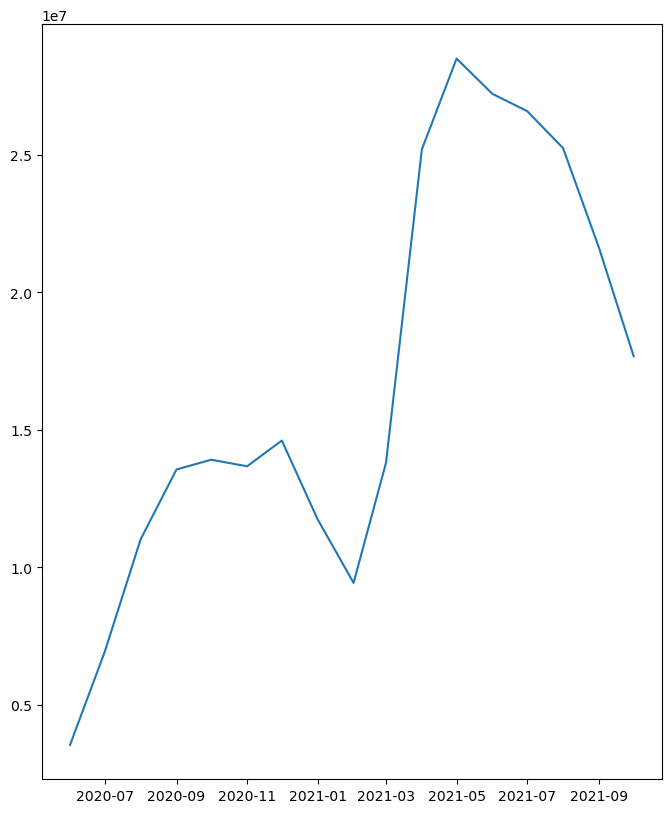

In [5]:
plt.figure(figsize=(8,10), dpi=100)
plt.plot(df_test_["month_year"], df_test_["RTPCR"])
plt.show()

In [6]:
df_test

,RTPCR,month_year
83,89644.0,6-2020
84,84339.0,6-2020
85,84519.0,6-2020
86,86201.0,6-2020
87,88580.0,6-2020
...,...,...
596,632670.0,10-2021
597,630305.0,10-2021
598,609195.0,10-2021
599,541094.0,10-2021


---
getting the case data

In [7]:
df_cases = pd.read_csv("Data/national/case_time_series.csv")
df_cases.drop(df_cases.columns.difference(['Date_YMD' , 'Daily Confirmed']), 1, inplace=True)
df_cases.sample(10)

/var/folders/t9/07dkzgf117b69lnz9s626dqw0000gn/T/ipykernel_3795/3281160843.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cases.drop(df_cases.columns.difference(['Date_YMD' , 'Daily Confirmed']), 1, inplace=True)


,Date_YMD,Daily Confirmed
588,2021-09-09,24151
416,2021-03-21,47009
385,2021-02-18,13237
202,2020-08-19,69196
163,2020-07-11,27757
285,2020-11-10,44724
518,2021-07-01,46781
494,2021-06-07,85804
351,2021-01-15,15155
571,2021-08-23,24794


In [8]:
df_cases['Date_YMD'] = pd.to_datetime(df_cases['Date_YMD'] ,format='%Y-%m-%d')
df_cases["month_year"]=0
for i in df_cases.index:
    df_cases.loc[i,"month_year"] = str(df_cases["Date_YMD"][i].month) +"-"+ str(df_cases["Date_YMD"][i].year)
df_cases = df_cases.drop(columns=["Date_YMD"])
df_cases_ = df_cases.groupby("month_year").sum()
df_cases_ = df_cases_.reset_index(level=0)
df_cases_['month_year'] = pd.to_datetime(df_cases_['month_year'], format='%m-%Y')

df_cases_ = df_cases_.sort_values(by="month_year")
df_cases_

,month_year,Daily Confirmed
0,2020-01-01,1
6,2020-02-01,2
8,2020-03-01,1632
10,2020-04-01,33231
12,2020-05-01,155783
14,2020-06-01,395146
16,2020-07-01,1111273
18,2020-08-01,1990885
20,2020-09-01,2622323
2,2020-10-01,1873041


In [9]:
final_df = pd.merge(df_cases_, df_test_, on="month_year", how='inner')
final_df

,month_year,Daily Confirmed,RTPCR
0,2020-06-01,395146,3530519.0
1,2020-07-01,1111273,6922883.0
2,2020-08-01,1990885,11014204.0
3,2020-09-01,2622323,13557775.0
4,2020-10-01,1873041,13912014.0
5,2020-11-01,1279861,13673520.0
6,2020-12-01,823056,14610385.0
7,2021-01-01,472317,11739379.0
8,2021-02-01,353427,9429034.0
9,2021-03-01,1108656,13798085.0


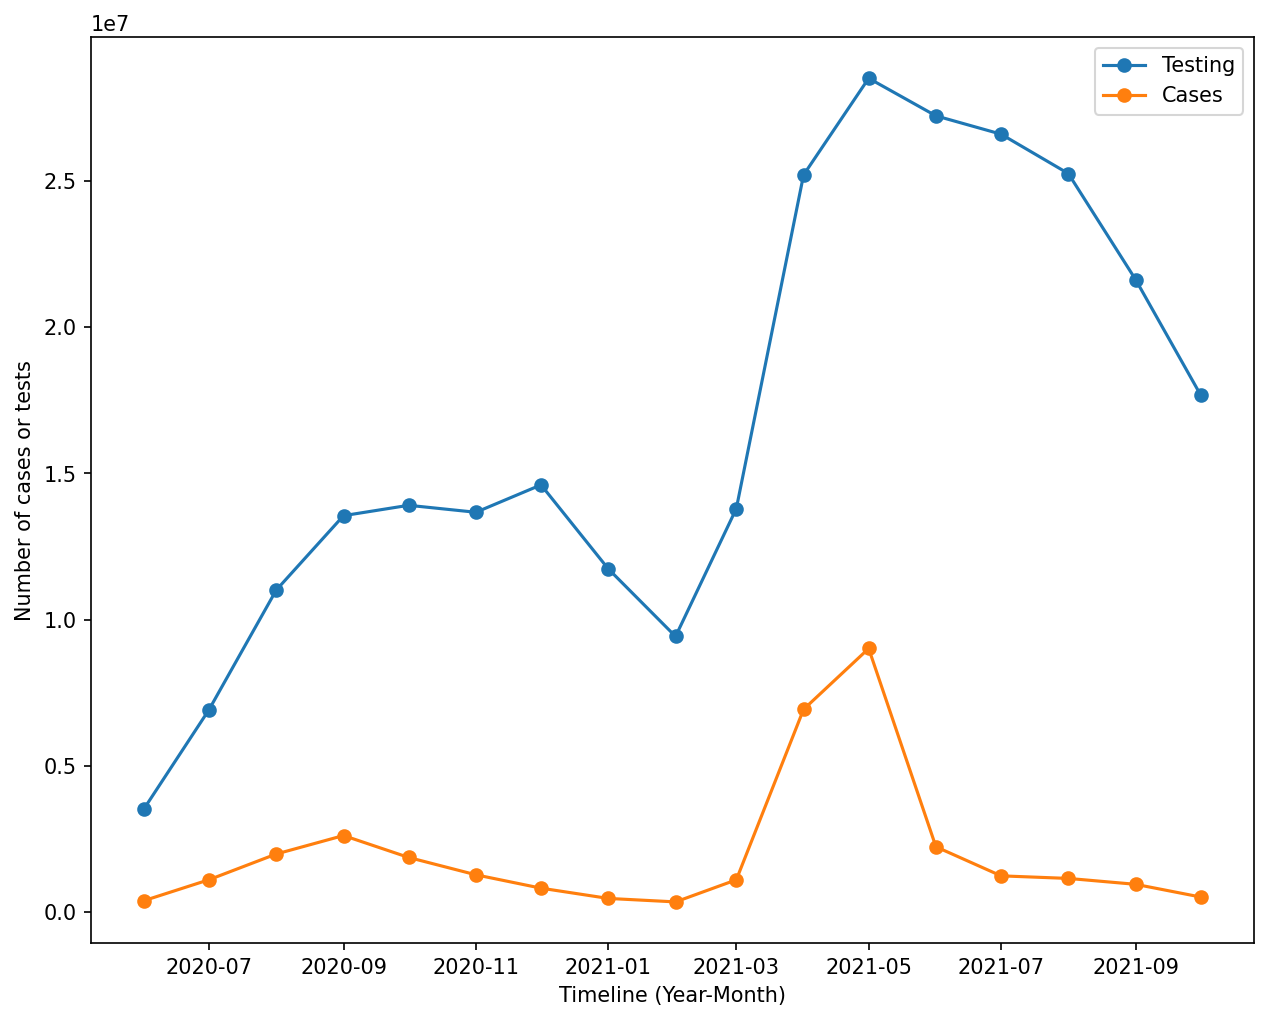

In [10]:
plt.figure(figsize=(10,8), dpi=150)

plt.plot(final_df["month_year"], (final_df["RTPCR"]), marker = 'o', label="Testing")
plt.plot(final_df["month_year"], (final_df["Daily Confirmed"]), marker ='o', label = "Cases")
plt.xlabel("Timeline (Year-Month)")
plt.ylabel("Number of cases or tests")
plt.legend()
plt.show()

<hr><hr>

In [11]:

import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

## Trend For Vaccination and Cases

In [12]:
df_owid = pd.read_csv("Data/national/owid-covid-data.csv")
df_owid = df_owid[['location', 'date' ,'new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed','new_tests', 'new_tests_smoothed','new_vaccinations', 'new_vaccinations_smoothed']]
df_owid['date'] = pd.to_datetime(df_owid['date'], format='%d/%m/%y')
df_owid = df_owid.loc[df_owid['location'] == 'India']
print(len(df_owid))
df_owid.sample(5)

812


,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_tests,new_tests_smoothed,new_vaccinations,new_vaccinations_smoothed
75013,India,2020-07-23,49310.0,40610.857,740.0,714.143,350823.0,333697.0,NaN,NaN
75532,India,2021-12-24,7189.0,7680.857,387.0,378.714,1165887.0,1186017.0,6335281.0,5598521.0
74978,India,2020-06-18,13586.0,11856.714,336.0,582.143,165412.0,148075.0,NaN,NaN
75107,India,2020-10-25,45148.0,51383.714,480.0,629.143,1140905.0,1185611.0,NaN,NaN
75087,India,2020-10-05,61267.0,77113.000,884.0,1035.857,989860.0,1145023.0,NaN,NaN


In [13]:
# df_owid = df_owid.dropna()
df_owid.shape

(812, 10)

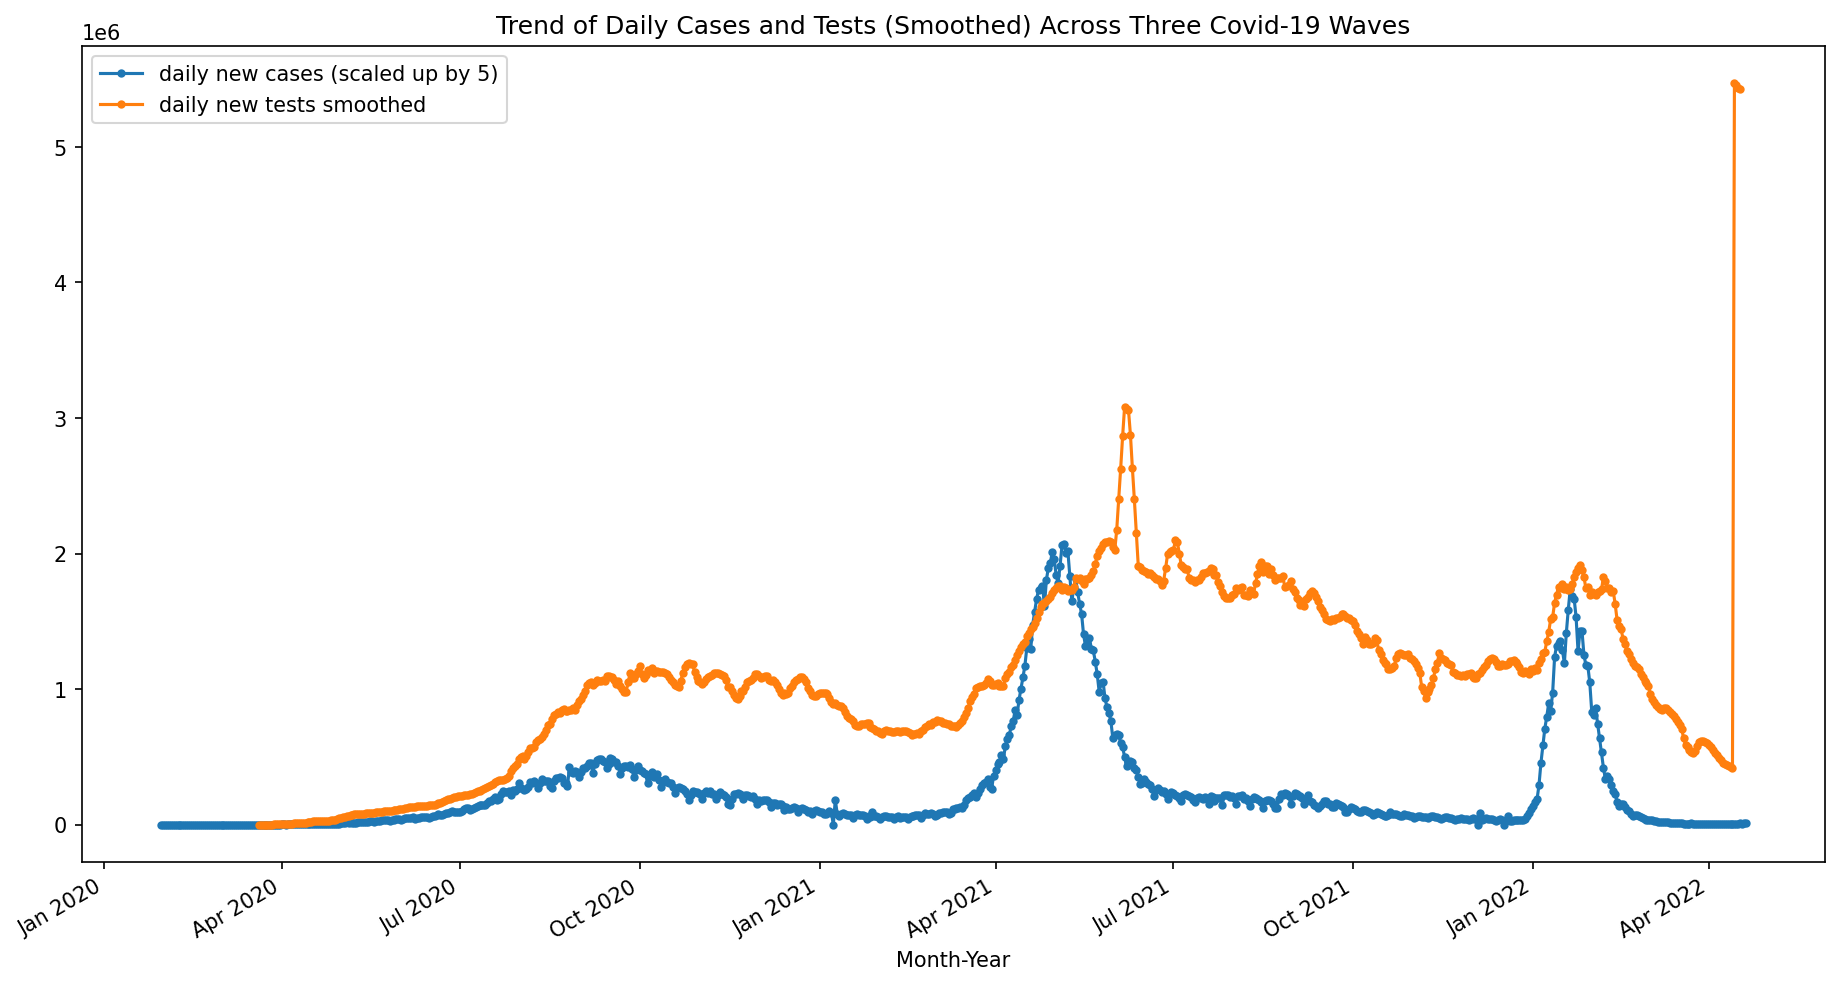

In [14]:
# Plotting
fig, ax1 = plt.subplots(figsize=(15,8), dpi=150)
ax1.plot(df_owid['date'], df_owid['new_cases'].mul(5), label='daily new cases (scaled up by 5)', marker='.')
ax1.plot(df_owid['date'], df_owid['new_tests_smoothed'], label='daily new tests smoothed', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax1.set (xlabel= "Month-Year", title= "Trend of Daily Cases and Tests (Smoothed) Across Three Covid-19 Waves")
date_form = DateFormatter("%b %Y")
ax1.xaxis.set_major_formatter(date_form)
plt.savefig("Plots/national/case-test.png")
plt.show()

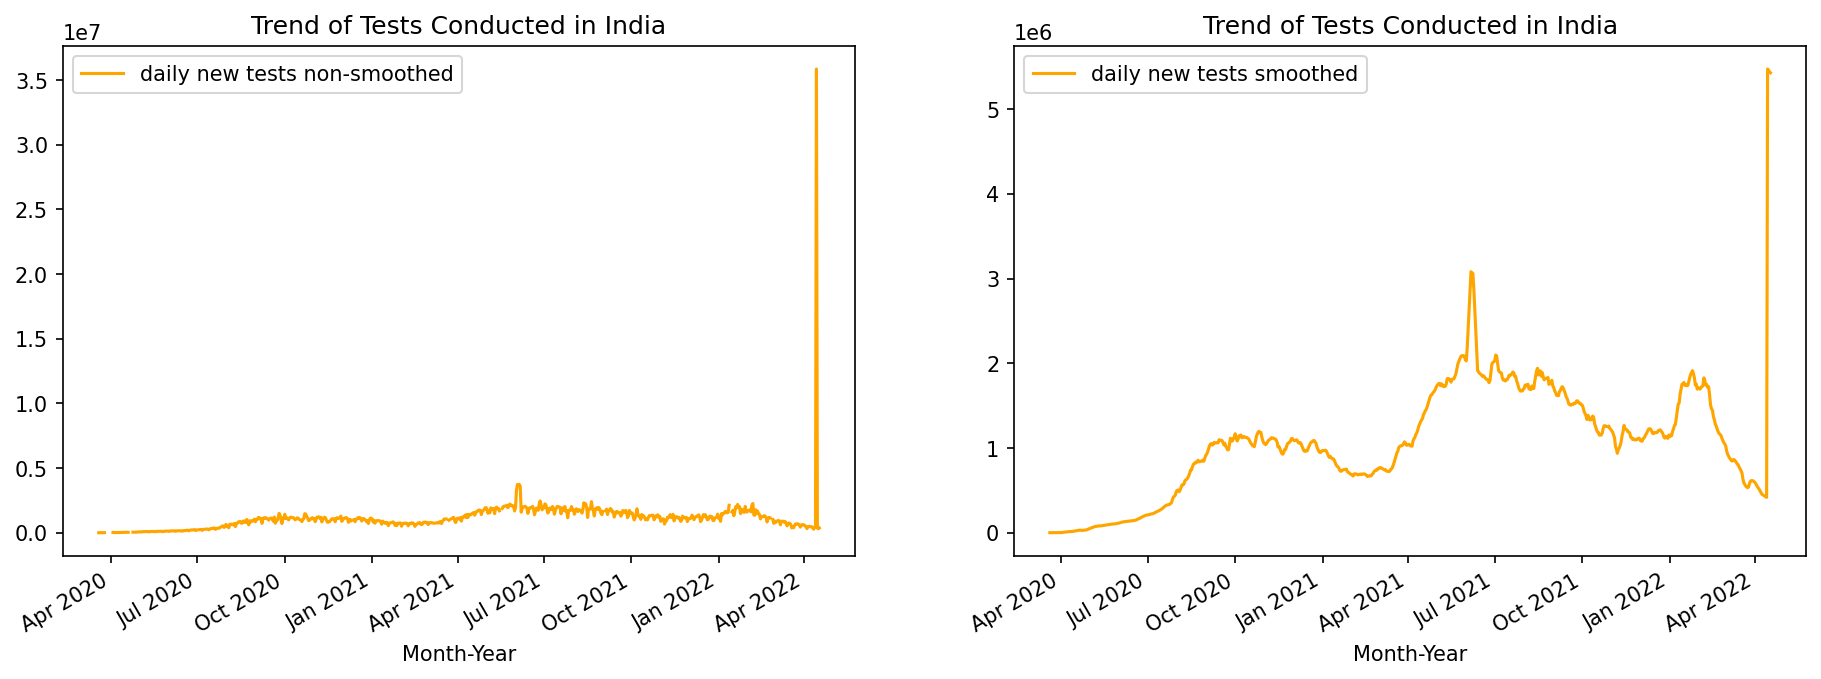

In [15]:
# Plotting
fig, axs = plt.subplots(1,2, figsize=(15,5), dpi=150)
axs[0].plot(df_owid['date'], df_owid['new_tests'], label='daily new tests non-smoothed', color="orange")
axs[1].plot(df_owid['date'], df_owid['new_tests_smoothed'], label='daily new tests smoothed', color="orange")
axs[0].legend()
axs[1].legend()
plt.gcf().autofmt_xdate()
axs[0].set (xlabel= "Month-Year", title= "Trend of Tests Conducted in India")
axs[1].set (xlabel= "Month-Year", title= "Trend of Tests Conducted in India")
date_form = DateFormatter("%b %Y")
axs[0].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_major_formatter(date_form)
plt.savefig("Plots/national/smooth-unsmooth.png")
plt.show()

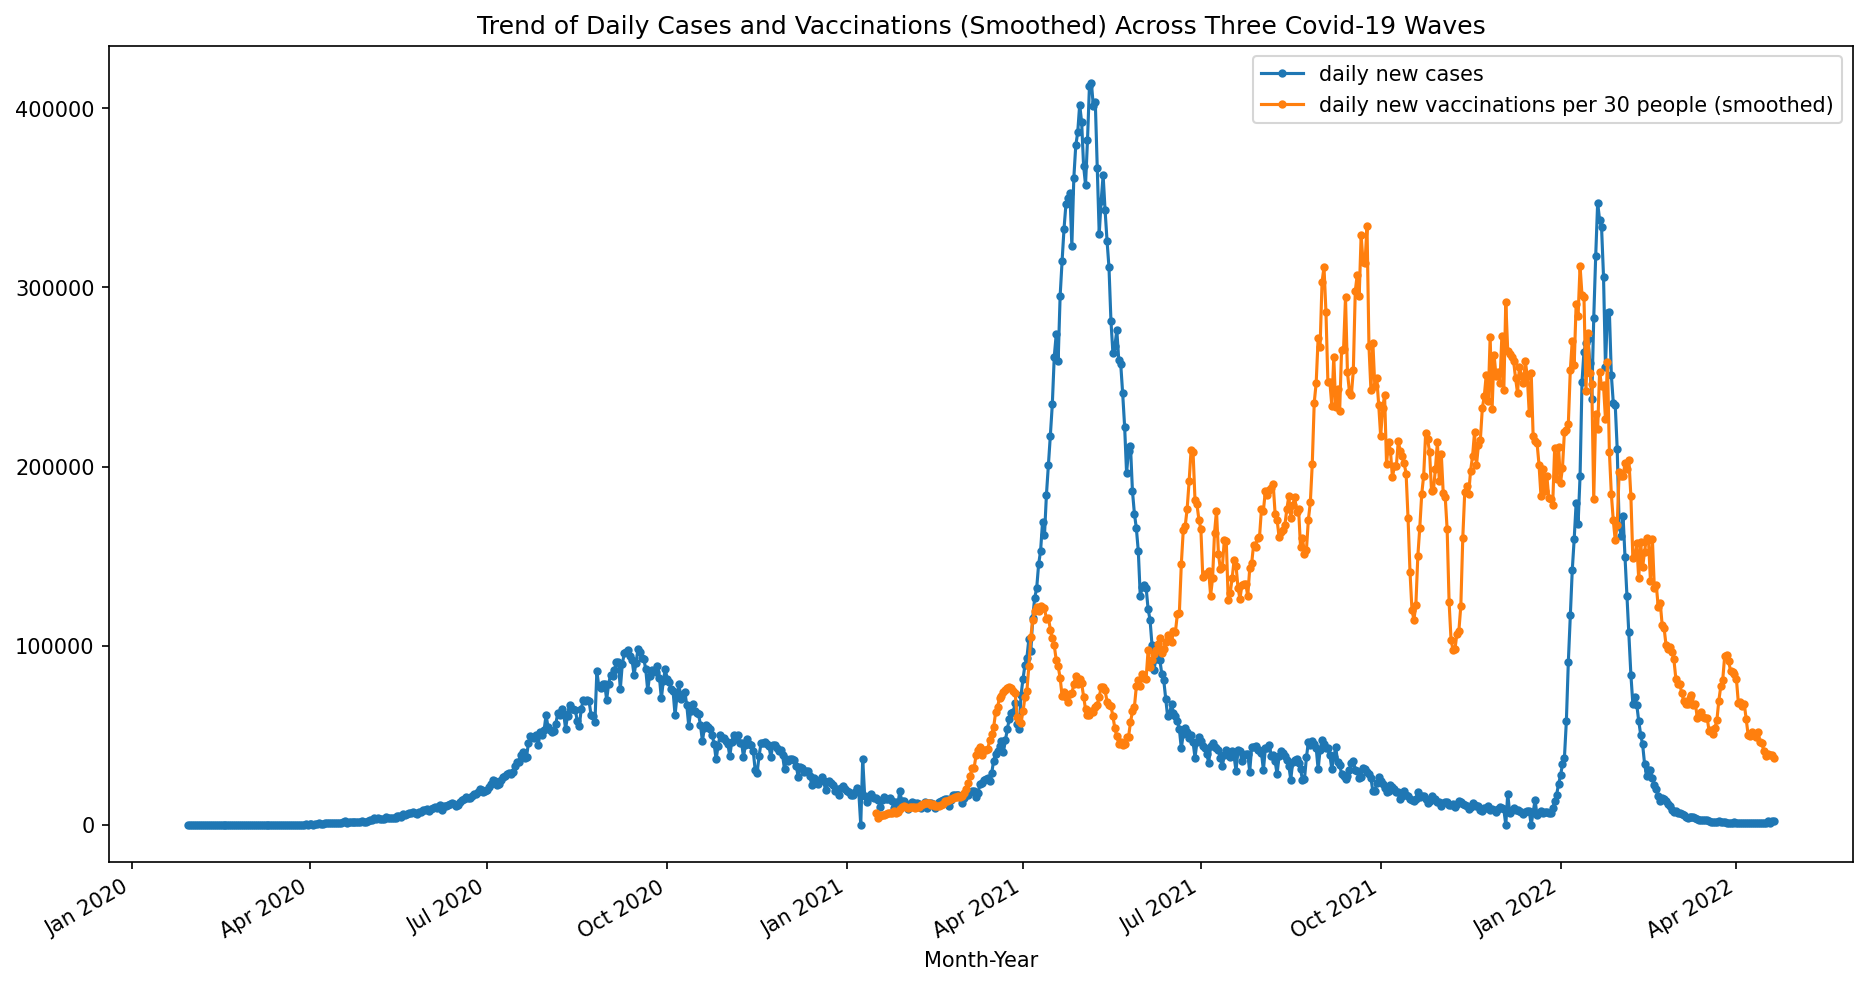

In [16]:
# Plotting
fig, ax2 = plt.subplots(figsize=(15,8), dpi=150)
ax2.plot(df_owid['date'], df_owid['new_cases'], label='daily new cases', marker='.')
ax2.plot(df_owid['date'], df_owid['new_vaccinations_smoothed'].div(30), label='daily new vaccinations per 30 people (smoothed)', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax2.set (xlabel= "Month-Year", title= "Trend of Daily Cases and Vaccinations (Smoothed) Across Three Covid-19 Waves")
date_form = DateFormatter("%b %Y")
ax2.xaxis.set_major_formatter(date_form)
plt.savefig("Plots/national/case-vaccine.png")
plt.show()

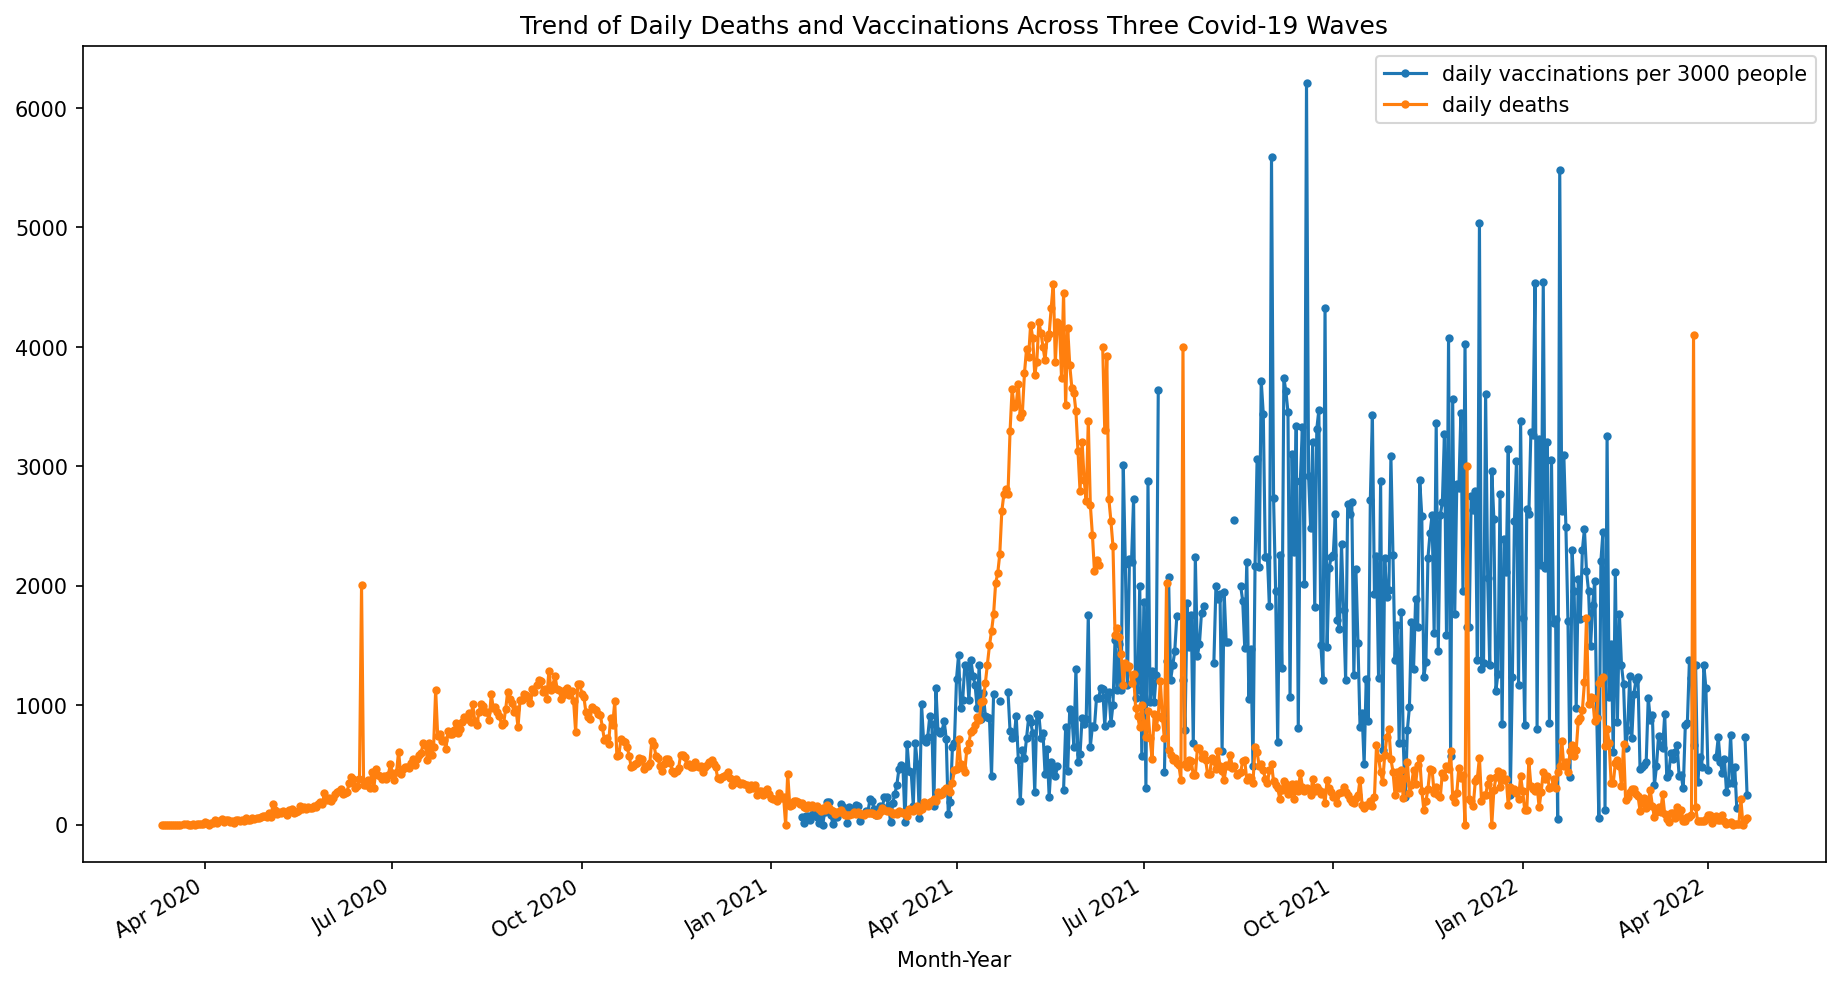

In [17]:
fig, ax3 = plt.subplots(figsize=(15,8), dpi=150)

ax3.plot(df_owid['date'], df_owid['new_vaccinations'].div(3e3), label='daily vaccinations per 3000 people', marker='.')
ax3.plot(df_owid['date'], df_owid['new_deaths'], label='daily deaths', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax3.set (xlabel= "Month-Year", title= "Trend of Daily Deaths and Vaccinations Across Three Covid-19 Waves")
date_form = DateFormatter("%b %Y")
ax3.xaxis.set_major_formatter(date_form)
plt.show()


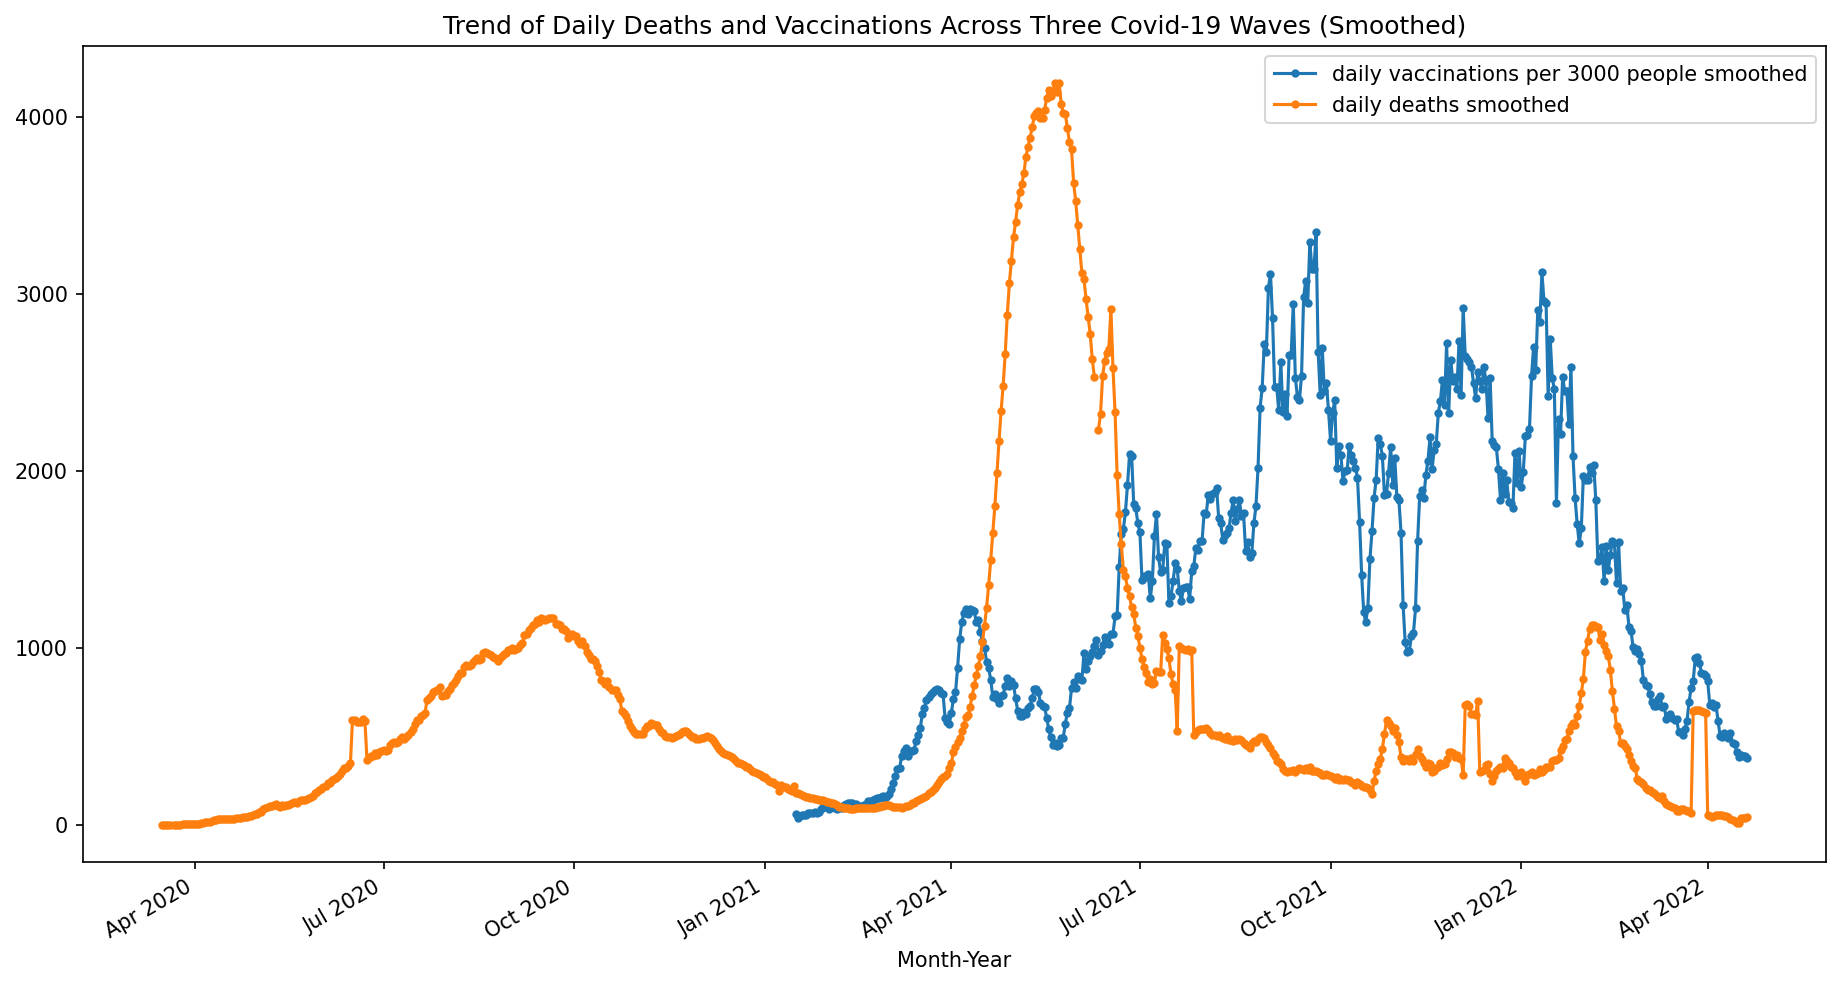

In [18]:
fig, ax3 = plt.subplots(figsize=(15,8), dpi=150)

ax3.plot(df_owid['date'], df_owid['new_vaccinations_smoothed'].div(3e3), label='daily vaccinations per 3000 people smoothed', marker='.')
ax3.plot(df_owid['date'], df_owid['new_deaths_smoothed'], label='daily deaths smoothed', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax3.set (xlabel= "Month-Year", title= "Trend of Daily Deaths and Vaccinations Across Three Covid-19 Waves (Smoothed)")
date_form = DateFormatter("%b %Y")
ax3.xaxis.set_major_formatter(date_form)
plt.savefig("Plots/national/death-vaccine.png")
plt.show()


In [19]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# from plotly.offline import plot, iplot, init_notebook_mode

# cases = go.Scatter(
#     x=df_owid["date"],
#     y=df_owid["new_cases"],
#     name= "New Cases per Day",
# #     marker=dict(
# #         symbol='circle',
# #         color='rgb(0,163,0)'
# #                )
# )

# deaths = go.Scatter(
#     x=df_owid["date"],
#     y=df_owid["new_deaths_smoothed"].mul(100),
#     name= "New Deaths per Day",
#     # marker = dict(
#     #     size = 12,
#     #     color='rgb(34,163,192)'
#     #            )
# )

# vaccine = go.Scatter(
#     x=df_owid["date"],
#     y=df_owid["new_vaccinations_smoothed"].div(30),
#     name= "New Vaccinations per Day",
#     # marker = dict(
#     #     color='rgb(34,100,0)'
#     #            )
# )

# fig = make_subplots(specs=[[{"secondary_y": True}]])
# fig.add_trace(cases)
# fig.add_trace(vaccine)
# fig.add_trace(deaths)
# fig['layout'].update(title = "Estimating deaths with cases",xaxis=dict(
#       tickangle=-90
#     ))
# iplot(fig)

In [20]:
# cases = px.line(df_owid, x="date", y="new_cases")
# # vaccines = px.line(df_owid, x="date", y="new_vaccinations_smoothed" , markers=True)
# cases.add_traces(go.Scatter(x=df_owid["date"],
#     y=df_owid["new_deaths_smoothed"].mul(90),
#     name= "New Deaths per Day (Scaled by 100)"))
# cases.show()



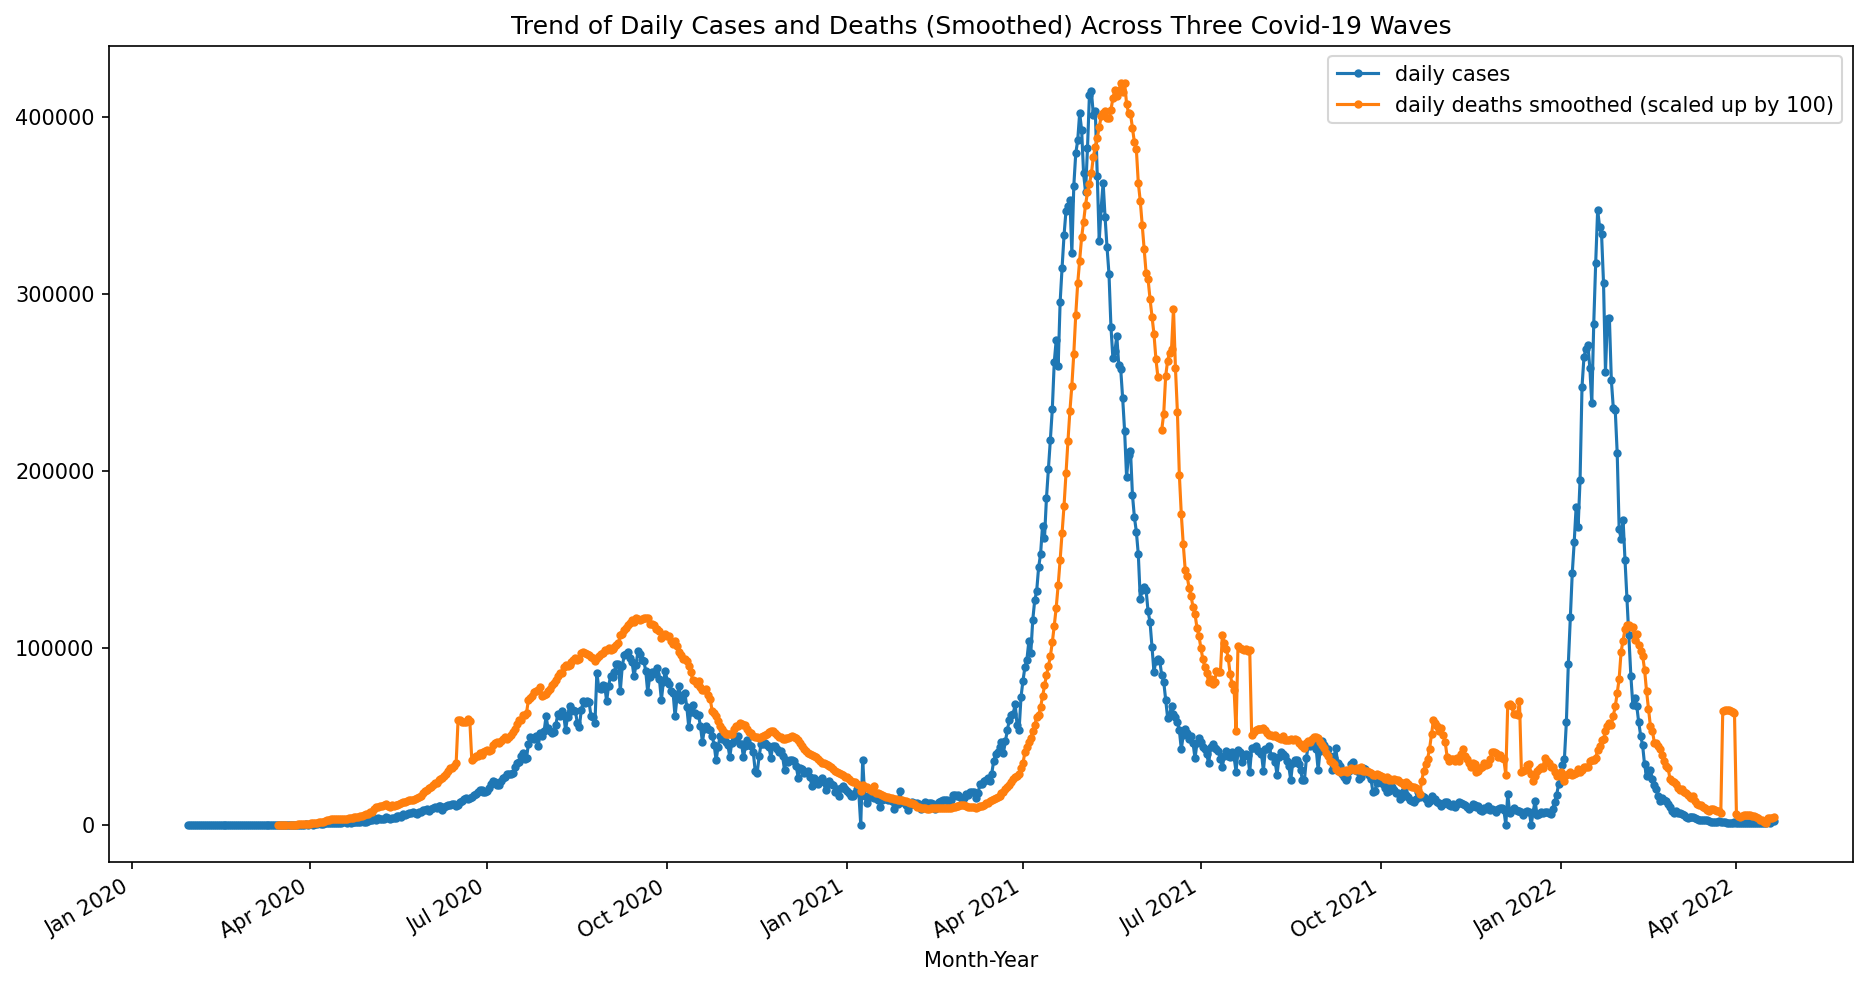

In [21]:
fig, ax4 = plt.subplots(figsize=(15,8), dpi=150)

ax4.plot(df_owid['date'], df_owid['new_cases'], label='daily cases', marker='.')
ax4.plot(df_owid['date'], df_owid["new_deaths_smoothed"].mul(100), label='daily deaths smoothed (scaled up by 100)', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax4.set (xlabel= "Month-Year", title= "Trend of Daily Cases and Deaths (Smoothed) Across Three Covid-19 Waves")
date_form = DateFormatter("%b %Y")
ax4.xaxis.set_major_formatter(date_form)
plt.savefig("Plots/national/case-death.png")
plt.show()


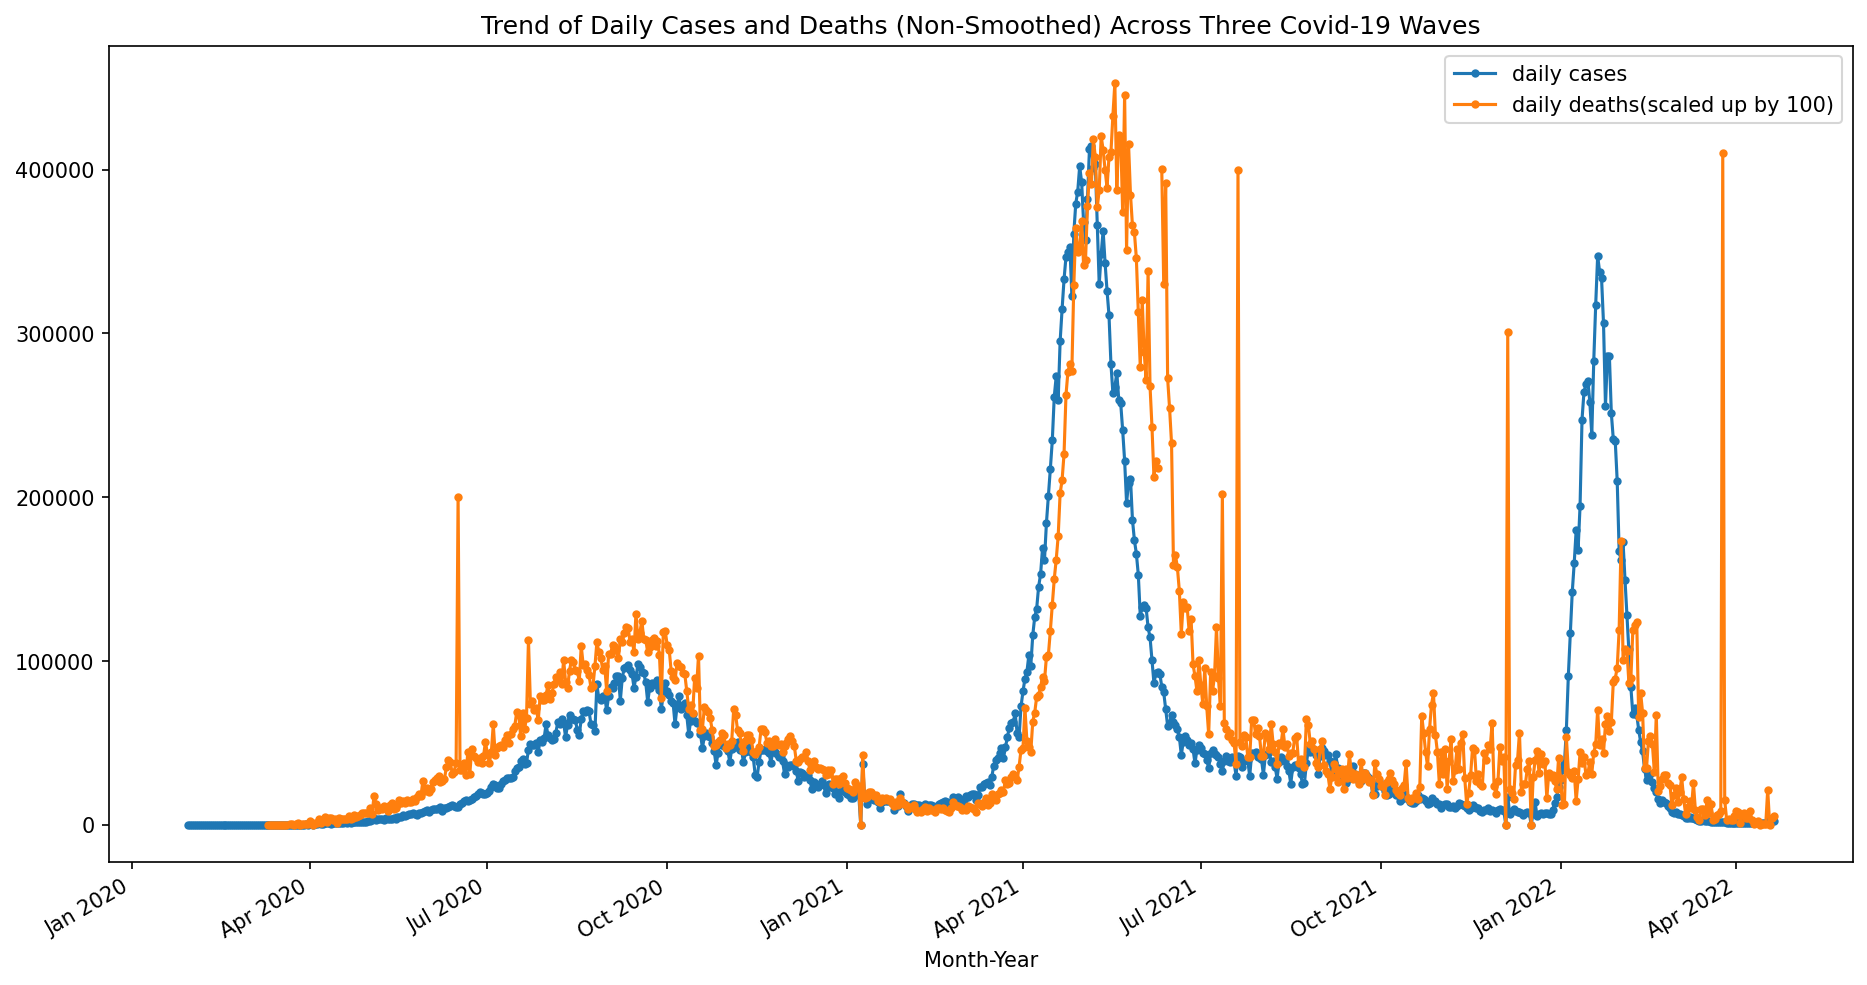

In [22]:
fig, ax4 = plt.subplots(figsize=(15,8), dpi=150)

ax4.plot(df_owid['date'], df_owid['new_cases'], label='daily cases', marker='.')
ax4.plot(df_owid['date'], df_owid["new_deaths"].mul(100), label='daily deaths(scaled up by 100)', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax4.set (xlabel= "Month-Year", title= "Trend of Daily Cases and Deaths (Non-Smoothed) Across Three Covid-19 Waves")
date_form = DateFormatter("%b %Y")
ax4.xaxis.set_major_formatter(date_form)
plt.show()

In [23]:
from datetime import datetime

In [24]:
# Take the dataframe for the first wave:
firstWave_start = datetime.strptime("2020-07-30", '%Y-%m-%d')
firstWave_end = datetime.strptime("2020-09-30", '%Y-%m-%d')
df_owid_firstWave = df_owid.loc[(df_owid['date']>=firstWave_start) & (df_owid['date']<=firstWave_end)]
df_owid_firstWave.sample(3)

,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_tests,new_tests_smoothed,new_vaccinations,new_vaccinations_smoothed
75053,India,2020-09-01,78357.0,77853.714,1045.0,996.571,1016920.0,928188.0,NaN,NaN
75050,India,2020-08-29,78761.0,71113.286,948.0,970.286,928761.0,845077.0,NaN,NaN
75039,India,2020-08-18,64572.0,62516.429,1091.0,971.000,899864.0,808488.0,NaN,NaN


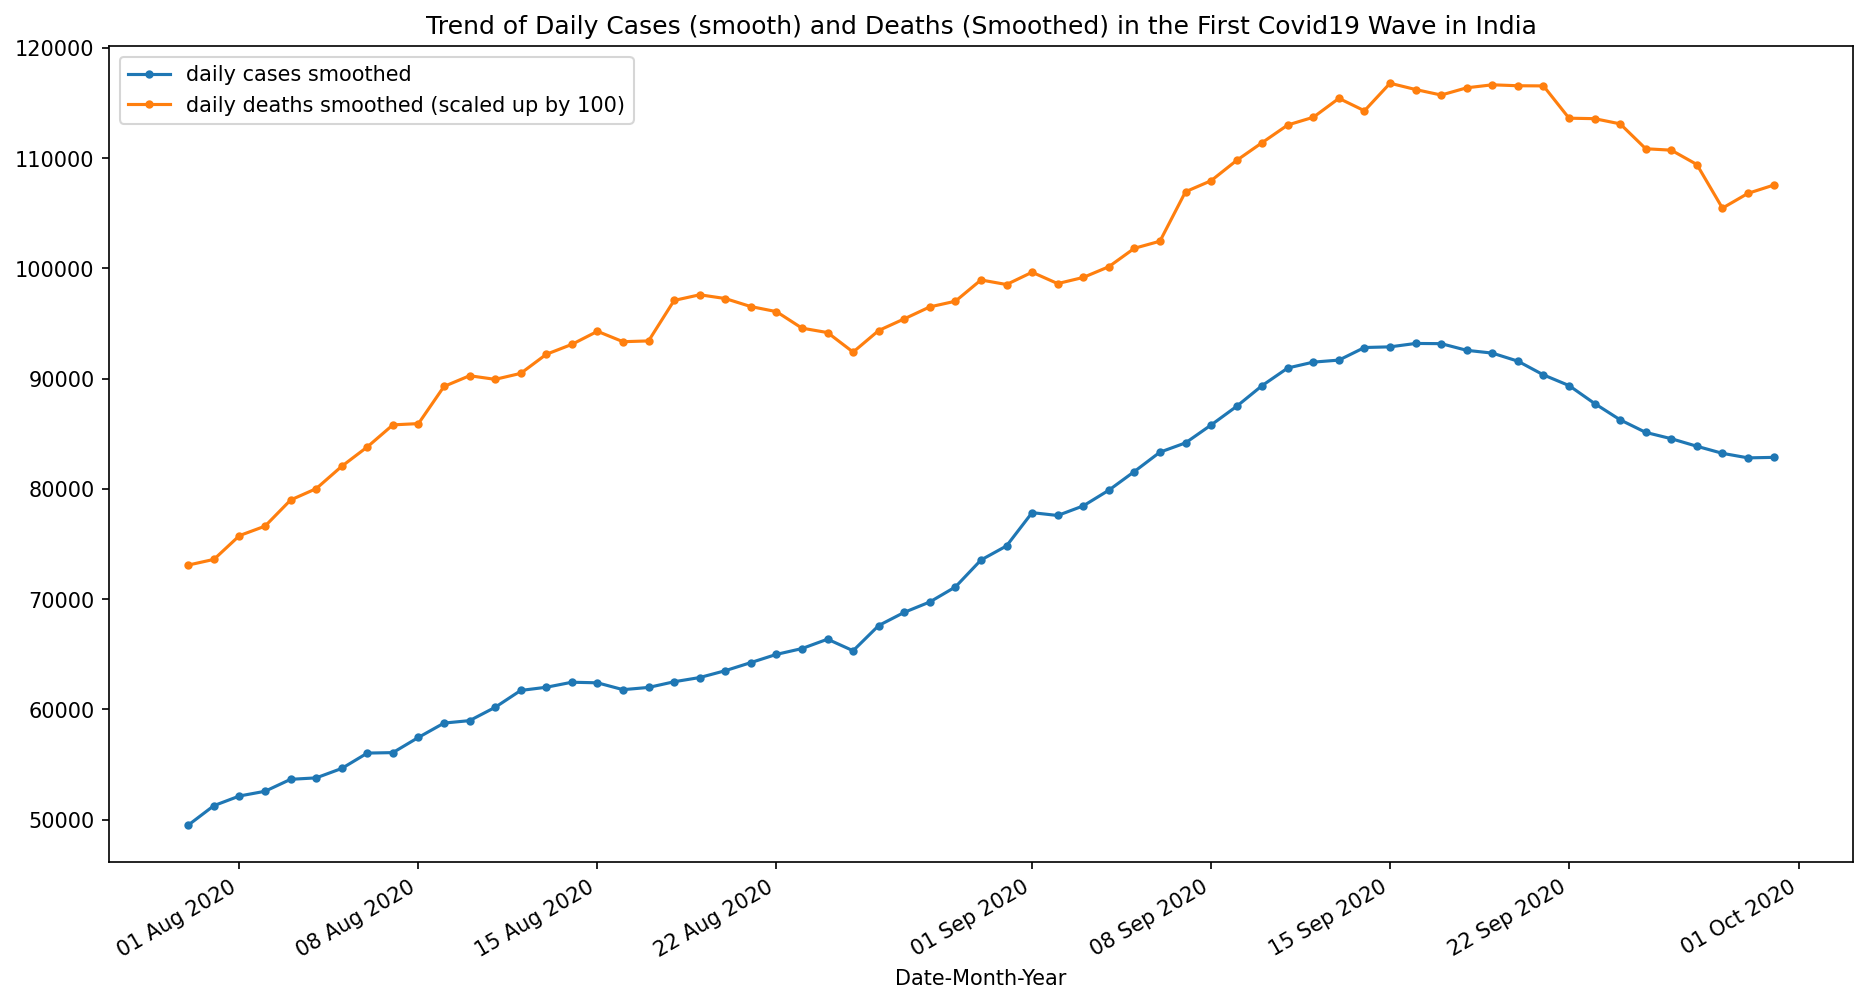

In [25]:
fig, ax5 = plt.subplots(figsize=(15,8), dpi=150)

ax5.plot(df_owid_firstWave['date'], df_owid_firstWave['new_cases_smoothed'], label='daily cases smoothed', marker='.')
ax5.plot(df_owid_firstWave['date'], df_owid_firstWave["new_deaths_smoothed"].mul(100), label='daily deaths smoothed (scaled up by 100)', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax5.set (xlabel= "Date-Month-Year", title= "Trend of Daily Cases (smooth) and Deaths (Smoothed) in the First Covid19 Wave in India")
date_form = DateFormatter("%d %b %Y")
ax5.xaxis.set_major_formatter(date_form)
plt.savefig("Plots/national/case-death-firstWave.png")
plt.show()

In [26]:
# Take the dataframe for the second wave:
secondWave_start = datetime.strptime("2021-02-28", '%Y-%m-%d')
secondWave_end = datetime.strptime("2021-07-01", '%Y-%m-%d')
df_owid_secondWave = df_owid.loc[(df_owid['date']>=secondWave_start) & (df_owid['date']<=secondWave_end)]
df_owid_secondWave.sample(3)

,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_tests,new_tests_smoothed,new_vaccinations,new_vaccinations_smoothed
75258,India,2021-03-25,59118.0,47474.429,257.0,225.571,1065021.0,1027246.0,2358731.0,2309232.0
75336,India,2021-06-11,84332.0,94896.571,4002.0,2232.143,2044131.0,2401220.0,3421339.0,2870782.0
75348,India,2021-06-23,54069.0,54637.857,1321.0,1439.714,1901056.0,1809461.0,3514882.0,5006348.0


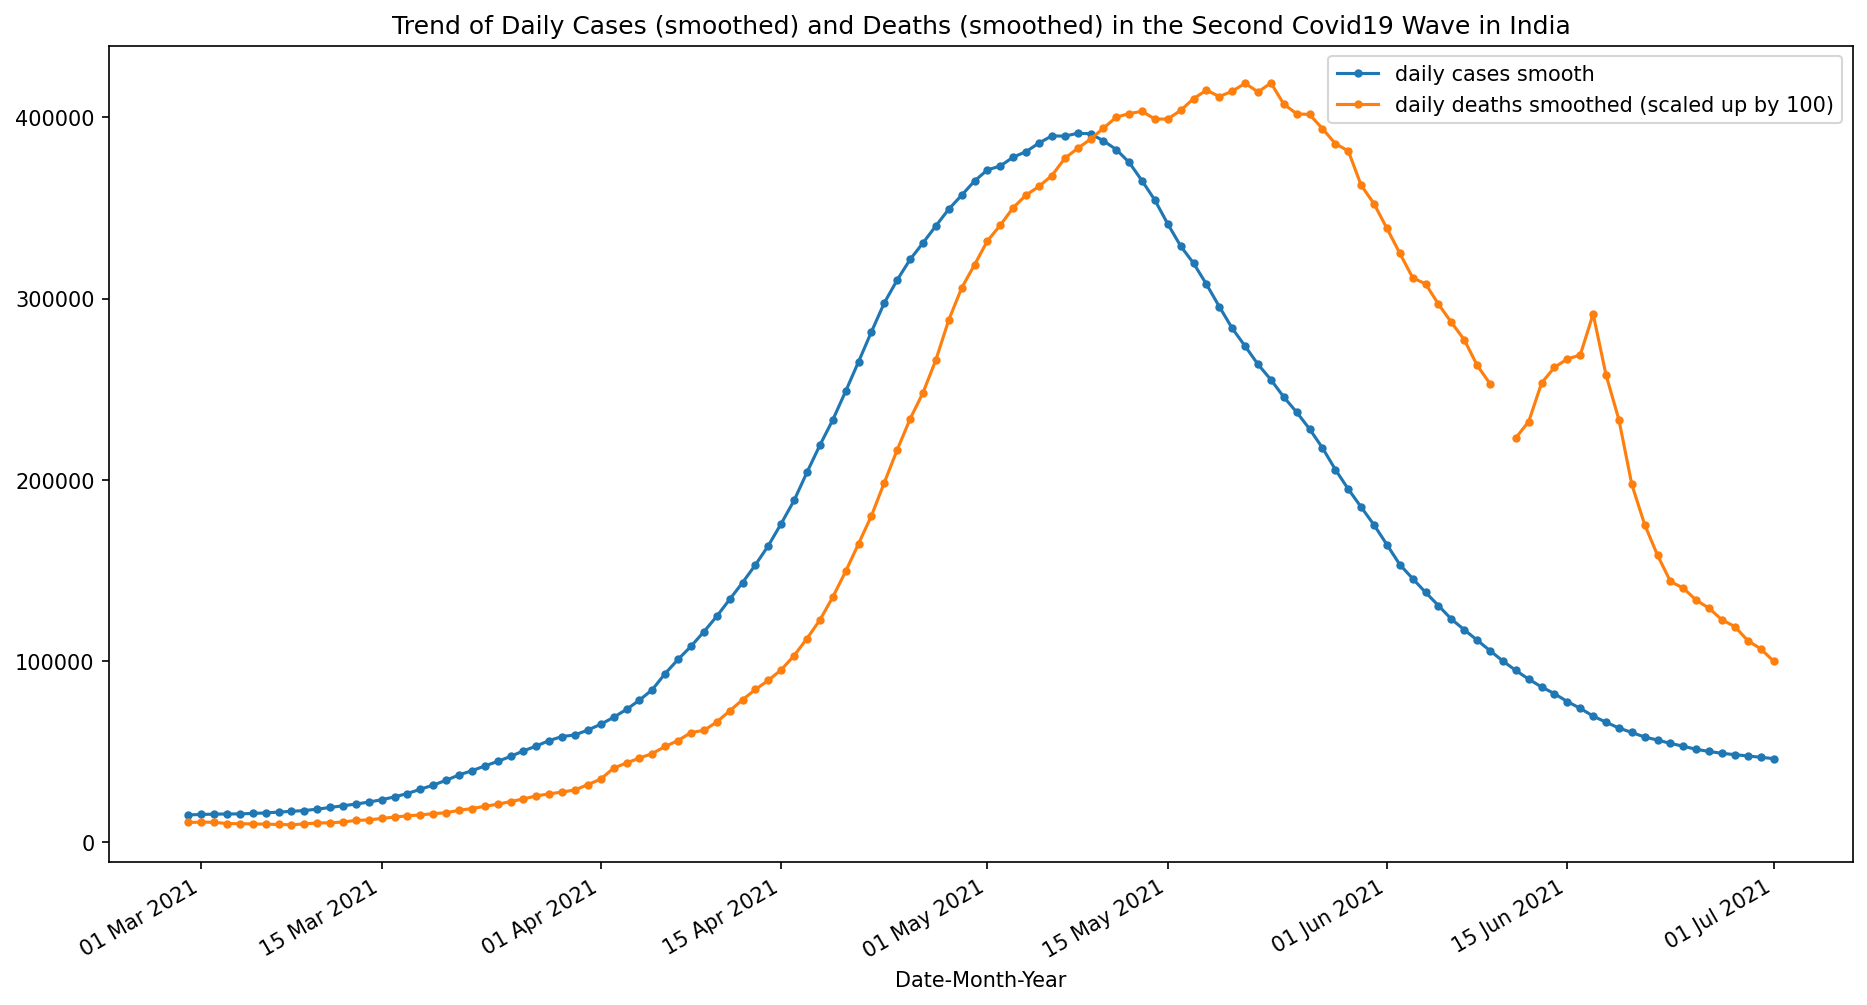

In [27]:
fig, ax5 = plt.subplots(figsize=(15,8), dpi=150)

ax5.plot(df_owid_secondWave['date'], df_owid_secondWave['new_cases_smoothed'], label='daily cases smooth', marker='.')
ax5.plot(df_owid_secondWave['date'], df_owid_secondWave["new_deaths_smoothed"].mul(100), label='daily deaths smoothed (scaled up by 100)', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax5.set (xlabel= "Date-Month-Year", title= "Trend of Daily Cases (smoothed) and Deaths (smoothed) in the Second Covid19 Wave in India")
date_form = DateFormatter("%d %b %Y")
ax5.xaxis.set_major_formatter(date_form)
plt.savefig("Plots/national/case-death-secondWave.png")
plt.show()

In [28]:
# Take the dataframe for the third wave:
thirdWave_start = datetime.strptime("2022-01-01", '%Y-%m-%d')
thirdWave_end = datetime.strptime("2022-03-17", '%Y-%m-%d')
df_owid_thirdWave = df_owid.loc[(df_owid['date']>=thirdWave_start) & (df_owid['date']<=thirdWave_end)]
df_owid_thirdWave.sample(3)

,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_tests,new_tests_smoothed,new_vaccinations,new_vaccinations_smoothed
75550,India,2022-01-11,194720.0,150307.429,442.0,300.571,1579928.0,1532384.0,13619197.0,9358811.0
75588,India,2022-02-18,22270.0,30851.571,325.0,464.143,1319327.0,1283106.0,4004946.0,3966236.0
75564,India,2022-01-25,285914.0,311982.143,665.0,560.714,1807100.0,1913001.0,6892485.0,7758004.0


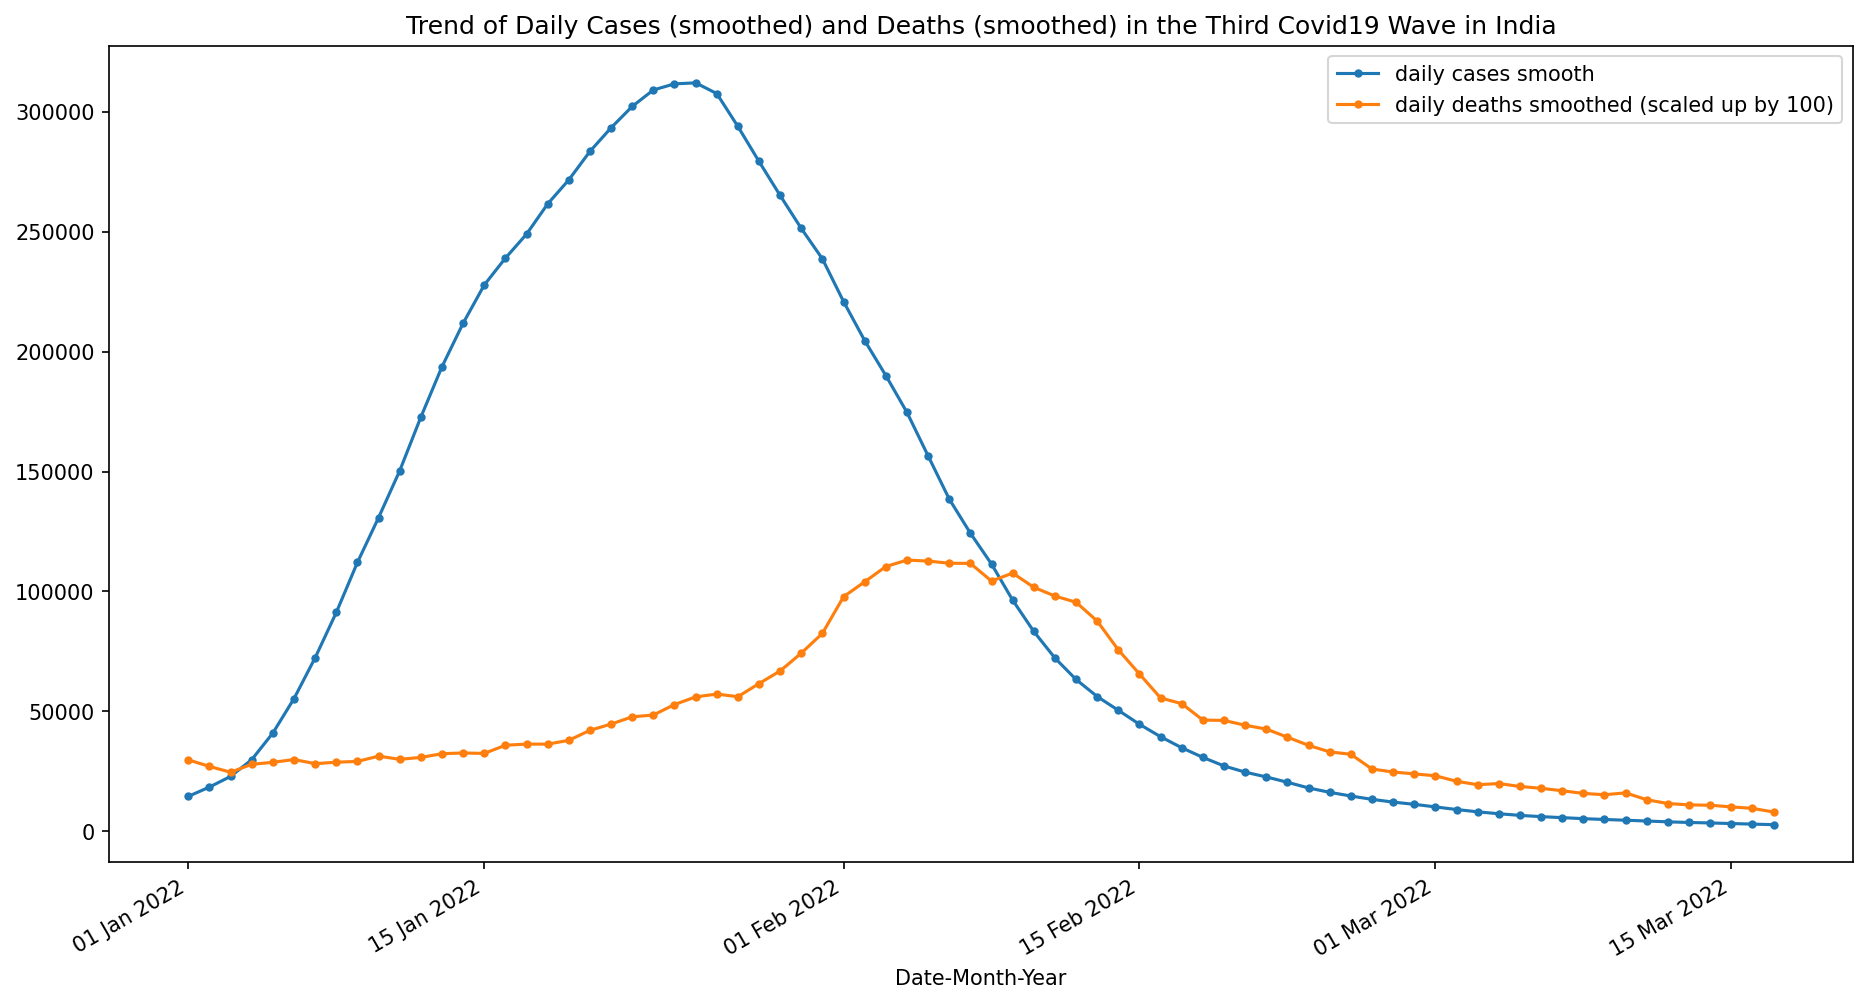

In [29]:
fig, ax5 = plt.subplots(figsize=(15,8), dpi=150)

ax5.plot(df_owid_thirdWave['date'], df_owid_thirdWave['new_cases_smoothed'], label='daily cases smooth', marker='.')
ax5.plot(df_owid_thirdWave['date'], df_owid_thirdWave["new_deaths_smoothed"].mul(100), label='daily deaths smoothed (scaled up by 100)', marker='.')
plt.legend()
plt.gcf().autofmt_xdate()
ax5.set (xlabel= "Date-Month-Year", title= "Trend of Daily Cases (smoothed) and Deaths (smoothed) in the Third Covid19 Wave in India")
date_form = DateFormatter("%d %b %Y")
ax5.xaxis.set_major_formatter(date_form)
plt.savefig("Plots/national/case-death-thirdWave.png")
plt.show()

In [30]:
# Pearson Coorelation Coefficient
df_owid[['new_cases','new_deaths_smoothed','new_vaccinations_smoothed' , 'new_tests']].corr(method ='spearman')

,new_cases,new_deaths_smoothed,new_vaccinations_smoothed,new_tests
new_cases,1.000000,0.803316,0.114942,0.623754
new_deaths_smoothed,0.803316,1.000000,0.255499,0.578538
new_vaccinations_smoothed,0.114942,0.255499,1.000000,0.407833
new_tests,0.623754,0.578538,0.407833,1.000000


In [31]:
df_owid_copy = df_owid.copy(deep=True)
df_owid_copy['new_deaths_smoothed'] = df_owid_copy['new_deaths_smoothed'].shift(-13)

df_owid_copy=df_owid_copy.dropna()
df_owid_copy[['new_cases','new_deaths_smoothed','new_vaccinations_smoothed' , 'new_tests']].corr(method ='spearman')

,new_cases,new_deaths_smoothed,new_vaccinations_smoothed,new_tests
new_cases,1.000000,0.755738,0.054813,0.736133
new_deaths_smoothed,0.755738,1.000000,0.130036,0.688651
new_vaccinations_smoothed,0.054813,0.130036,1.000000,0.409207
new_tests,0.736133,0.688651,0.409207,1.000000


### Calculating Spearman Correlation for each wave

In [32]:
def calc_spearman (wave_df, shift):
    wave_df_copy = wave_df.copy(deep=True)
    wave_df_copy['new_deaths_smoothed'] = wave_df_copy['new_deaths_smoothed'].shift(-shift)
    wave_df_copy = wave_df_copy.dropna(subset=['new_deaths_smoothed', 'new_cases'])
    # print(wave_df_copy)
    return wave_df_copy[['new_cases','new_deaths_smoothed','new_vaccinations_smoothed' , 'new_tests']].corr(method ='spearman')

In [33]:
# calculating trend of correlation coeff for different waves
def correlation_trend(wave_df):
    dict_ = {}
    for i in range(30):
        temp_df = calc_spearman(wave_df , i)
        dict_[i] = temp_df['new_cases']['new_deaths_smoothed']
    return dict_

In [34]:

def plot_correlation_trend(wave_df, i):
    corr_dict = correlation_trend(wave_df)
    fig = plt.figure(figsize=(10,6), dpi=90)
    plt.plot(corr_dict.keys(), corr_dict.values())
    Keymax = max(zip(corr_dict.values(),corr_dict.keys()))[1]
    plt.ylabel("Spearman Correlation Coeff Value, max at shift: "+str(Keymax))
    plt.xlabel("Shift (in days)")
    plt.savefig("Plots/national/spearman-wave-"+str(i)+".png")
    plt.show()
    i +=1
    return Keymax,i

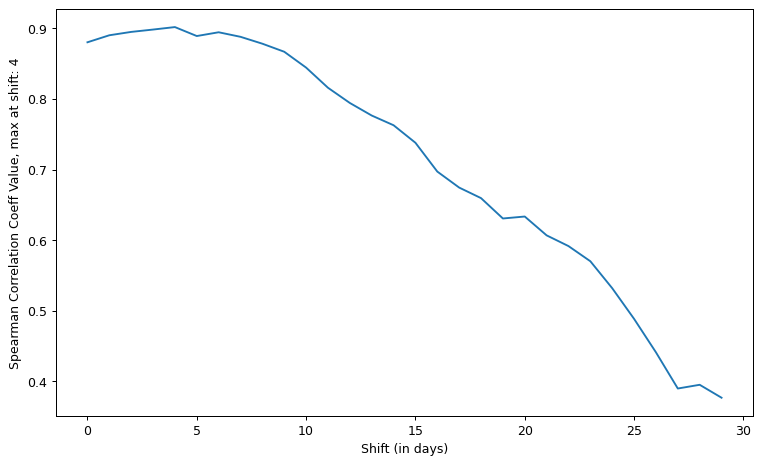

,new_cases,new_deaths_smoothed,new_vaccinations_smoothed,new_tests
new_cases,1.000000,0.901753,NaN,0.850964
new_deaths_smoothed,0.901753,1.000000,NaN,0.798773
new_vaccinations_smoothed,NaN,NaN,NaN,NaN
new_tests,0.850964,0.798773,NaN,1.000000


In [35]:
i=1
shift_val_first,i= plot_correlation_trend(df_owid_firstWave, i)
calc_spearman(df_owid_firstWave, shift_val_first)

In [36]:
i

2

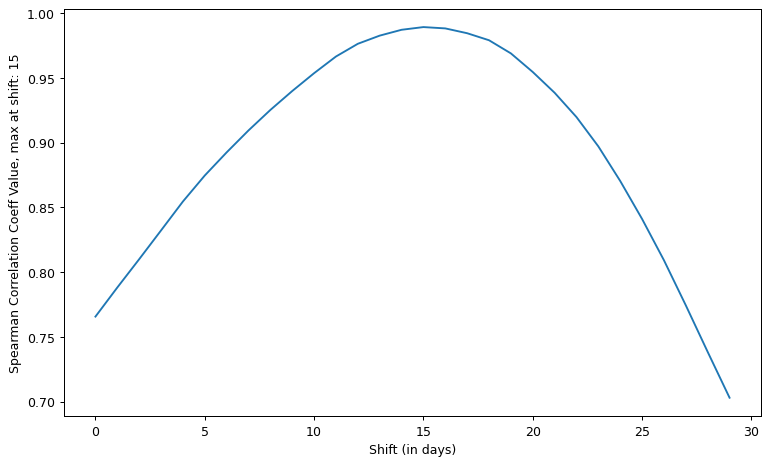

,new_cases,new_deaths_smoothed,new_vaccinations_smoothed,new_tests
new_cases,1.000000,0.989394,0.276620,0.614693
new_deaths_smoothed,0.989394,1.000000,0.308131,0.608616
new_vaccinations_smoothed,0.276620,0.308131,1.000000,0.311319
new_tests,0.614693,0.608616,0.311319,1.000000


In [37]:
shift_val_second ,i = plot_correlation_trend(df_owid_secondWave,i)
calc_spearman(df_owid_secondWave, shift_val_second)

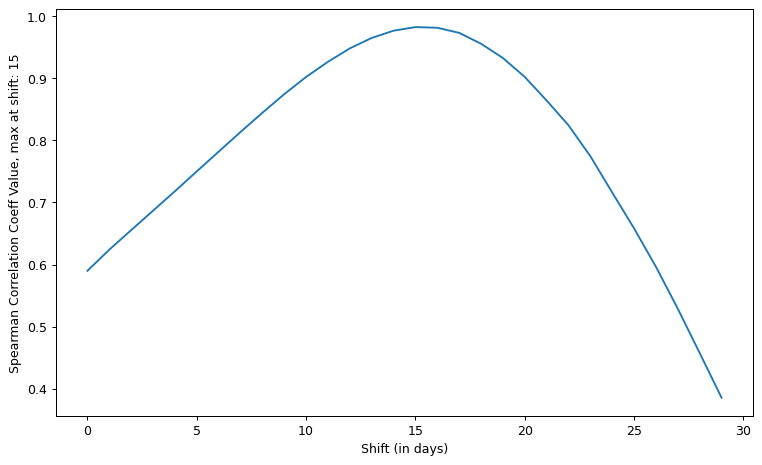

,new_cases,new_deaths_smoothed,new_vaccinations_smoothed,new_tests
new_cases,1.000000,0.982602,0.795875,0.812289
new_deaths_smoothed,0.982602,1.000000,0.779958,0.771066
new_vaccinations_smoothed,0.795875,0.779958,1.000000,0.579466
new_tests,0.812289,0.771066,0.579466,1.000000


In [38]:
shift_val_third,i = plot_correlation_trend(df_owid_thirdWave,i)
calc_spearman(df_owid_thirdWave, shift_val_third)

In [39]:
print(shift_val_first, shift_val_second, shift_val_third)

4 15 15


<hr><hr>


## Comparing Maharashtra, Karnataka & Delhi Data
<hr>

In [40]:
population_dict = {"Maharashtra" : {2020: 124862220 , 2021: 126189673}, \
    "Karnataka": {2020: 69586993 , 2021: 70501944}, "Delhi": {2020: 19298507 , 2021: 19570374}}

In [41]:
# state_case_data = pd.read_csv("Data/statewise/daily_case.csv")
# state_vaccine_data = state_case_data.loc[state_case_data['State'] == 'Maharashtra']

def add_population_slashed_dates (df, pop_dict):
    # First make date column a date type
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    # Only take a subset of the states
    df = df.loc[df['State'].isin(pop_dict.keys())]
    # Adding a new column
    df.insert(len(df.columns), 'Population',0)
    # Override
    for i in df.index:
        df.loc[i, "Population"] = pop_dict[df.loc[i,"State"]][df.loc[i,"Date"].year]
    return df

def add_population_dashed_dates (df, pop_dict):
    # First make date column a date type
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    # Only take a subset of the states
    df = df.loc[df['State'].isin(pop_dict.keys())]
    # Adding a new column
    df.insert(len(df.columns), 'Population',0)
    # Override
    for i in df.index:
        df.loc[i, "Population"] = pop_dict[df.loc[i,"State"]][df.loc[i,"Date"].year]
    return df

In [42]:
state_case_data = pd.read_csv("Data/statewise/daily_case.csv")
state_case_data = state_case_data.dropna(subset=['Confirmed'])
state_case_data = add_population_dashed_dates(state_case_data, population_dict)
state_case_data = state_case_data.sort_values(by="Date")
state_case_data

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Population
34,35,2020-03-02,6:00 PM,Delhi,1,0,0,0,1,19298507
38,39,2020-03-03,6:00 PM,Delhi,1,0,0,0,1,19298507
42,43,2020-03-04,6:00 PM,Delhi,1,0,0,0,1,19298507
45,46,2020-03-05,6:00 PM,Delhi,2,0,0,0,2,19298507
51,52,2020-03-06,6:00 PM,Delhi,3,0,0,0,3,19298507
...,...,...,...,...,...,...,...,...,...,...
18046,18047,2021-08-10,8:00 AM,Delhi,-,-,1411235,25067,1436800,19570374
18058,18059,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833,126189673
18089,18090,2021-08-11,8:00 AM,Karnataka,-,-,2861499,36848,2921049,70501944
18082,18083,2021-08-11,8:00 AM,Delhi,-,-,1411280,25068,1436852,19570374


In [43]:
state_vaccine_data = pd.read_csv("Data/statewise/state_vaccine.csv")
state_vaccine_data = state_vaccine_data.dropna(subset=['Total Doses Administered'])
state_vaccine_data = add_population_slashed_dates(state_vaccine_data, population_dict)
state_vaccine_data = state_vaccine_data.sort_values(by="Date")
state_vaccine_data

,Date,State,First Dose Administered,Second Dose Administered,Total Doses Administered,Population
8,2021-01-16,Delhi,4319,0,4319,19570374
15,2021-01-16,Karnataka,13594,0,13594,70501944
20,2021-01-16,Maharashtra,18328,0,18328,126189673
46,2021-01-18,Delhi,7968,0,7968,19570374
53,2021-01-18,Karnataka,66392,0,66392,70501944
...,...,...,...,...,...,...
10838,2021-10-30,Delhi,13043154,7413565,20456719,19570374
10850,2021-10-30,Maharashtra,67145633,30943704,98089337,126189673
10883,2021-10-31,Karnataka,42497761,22858384,65356145,70501944
10876,2021-10-31,Delhi,13055636,7425404,20481040,19570374


In [44]:
state_test_data = pd.read_csv("Data/statewise/state_test.csv")
state_test_data = state_test_data.dropna(subset=['TotalSamples'])
state_test_data = add_population_dashed_dates(state_test_data, population_dict)
state_test_data = state_test_data.sort_values(by="Date")
state_test_data

,Date,State,TotalSamples,Negative,Positive,Population
3507,2020-04-01,Delhi,2621.0,NaN,NaN,19298507
6919,2020-04-03,Karnataka,4587.0,4281,128.0,69586993
8888,2020-04-05,Maharashtra,16008.0,14837,NaN,124862220
8889,2020-04-06,Maharashtra,17563.0,15808,868.0,124862220
3508,2020-04-07,Delhi,9041.0,7308,576.0,19298507
...,...,...,...,...,...,...
7408,2021-08-09,Karnataka,39978515.0,NaN,NaN,70501944
9374,2021-08-09,Maharashtra,49725694.0,NaN,NaN,126189673
7409,2021-08-10,Karnataka,40104915.0,NaN,NaN,70501944
3995,2021-08-10,Delhi,24333906.0,NaN,NaN,19570374


In [45]:
state_case_data["case_density"] = state_case_data["Confirmed"].div(state_case_data["Population"])
state_test_data["test_density"] = state_test_data["TotalSamples"].div(state_test_data["Population"])
state_vaccine_data["vaccine_density"] = state_vaccine_data["Total Doses Administered"].div(state_vaccine_data["Population"])

In [46]:
# import libraries for plotting
from matplotlib import pyplot as plt
import plotly.express as px

In [47]:
def plot_state_date (state):
    temp_state = state_case_data.loc[state_case_data['State'].isin([state])].copy()
    temp_vacc = state_vaccine_data.loc[state_vaccine_data['State'].isin([state])].copy()
    temp_test = state_test_data.loc[state_test_data['State'].isin([state])].copy()

    # before plotting we need to clear some data also
    # Start at the last column and subtract from the previous
    index_lst = list(temp_state.index)
    # for i in range(len(index_lst)-1,0,-1):
    #     curr_ind = index_lst[i]
    #     prev_ind = index_lst[i-1]
    #     temp_state.loc[curr_ind,"Confirmed"] = temp_state.loc[curr_ind,"Confirmed"] - temp_state.loc[prev_ind,"Confirmed"]

    # Doing the same for vaccination
    index_lst = list(temp_vacc.index)
    # for i in range(len(index_lst)-1,0,-1):
    #     curr_ind = index_lst[i]
    #     prev_ind = index_lst[i-1]
    #     temp_vacc.loc[curr_ind,"Total Doses Administered"] = temp_vacc.loc[curr_ind,"Total Doses Administered"] - temp_vacc.loc[prev_ind,"Total Doses Administered"]

    # Doing the same for testing
    index_lst = list(temp_test.index)
    # for i in range(len(index_lst)-1,0,-1):
    #     curr_ind = index_lst[i]
    #     prev_ind = index_lst[i-1]
    #     temp_test.loc[curr_ind,"TotalSamples"] = temp_test.loc[curr_ind,"TotalSamples"] - temp_test.loc[prev_ind,"TotalSamples"]

    # Smoothing out the cases
    temp_state["case_smooth"] = temp_state["Confirmed"].rolling(7).sum()
    temp_vacc["vacc_smooth"] = temp_vacc["Total Doses Administered"].rolling(7).sum()
    temp_test["test_smooth"] = temp_test["TotalSamples"].rolling(7).sum()

    # Normalising by population
    temp_state["case_density"] = temp_state["case_smooth"].div(temp_state["Population"])
    temp_test["test_density"] = temp_test["test_smooth"].div(temp_test["Population"])
    temp_vacc["vaccine_density"] = temp_vacc["vacc_smooth"].div(temp_vacc["Population"])

    fig, ax = plt.subplots(figsize=(15,8), dpi=150)
    ax.plot(temp_state["Date"], temp_state["case_density"].mul(1), label = "Cases Density Smoothed")
    ax.plot(temp_vacc["Date"], temp_vacc["vaccine_density"], label ="Vaccination Density Smoothed")
    ax.plot(temp_test["Date"], temp_test["test_density"], label = "Testing Density Smoothed")
    ax.legend()
    ax.grid(True)
    plt.gcf().autofmt_xdate()
    date_form = DateFormatter("%b %Y")
    ax.xaxis.set_major_formatter(date_form)
    plt.xlabel("Date")
    plt.ylabel(state)
    plt.title("Comparsion Of Covid-19 Cases, Vaccination and Testing Densities in "+ state +" (Smoothed)")
    plt.show()

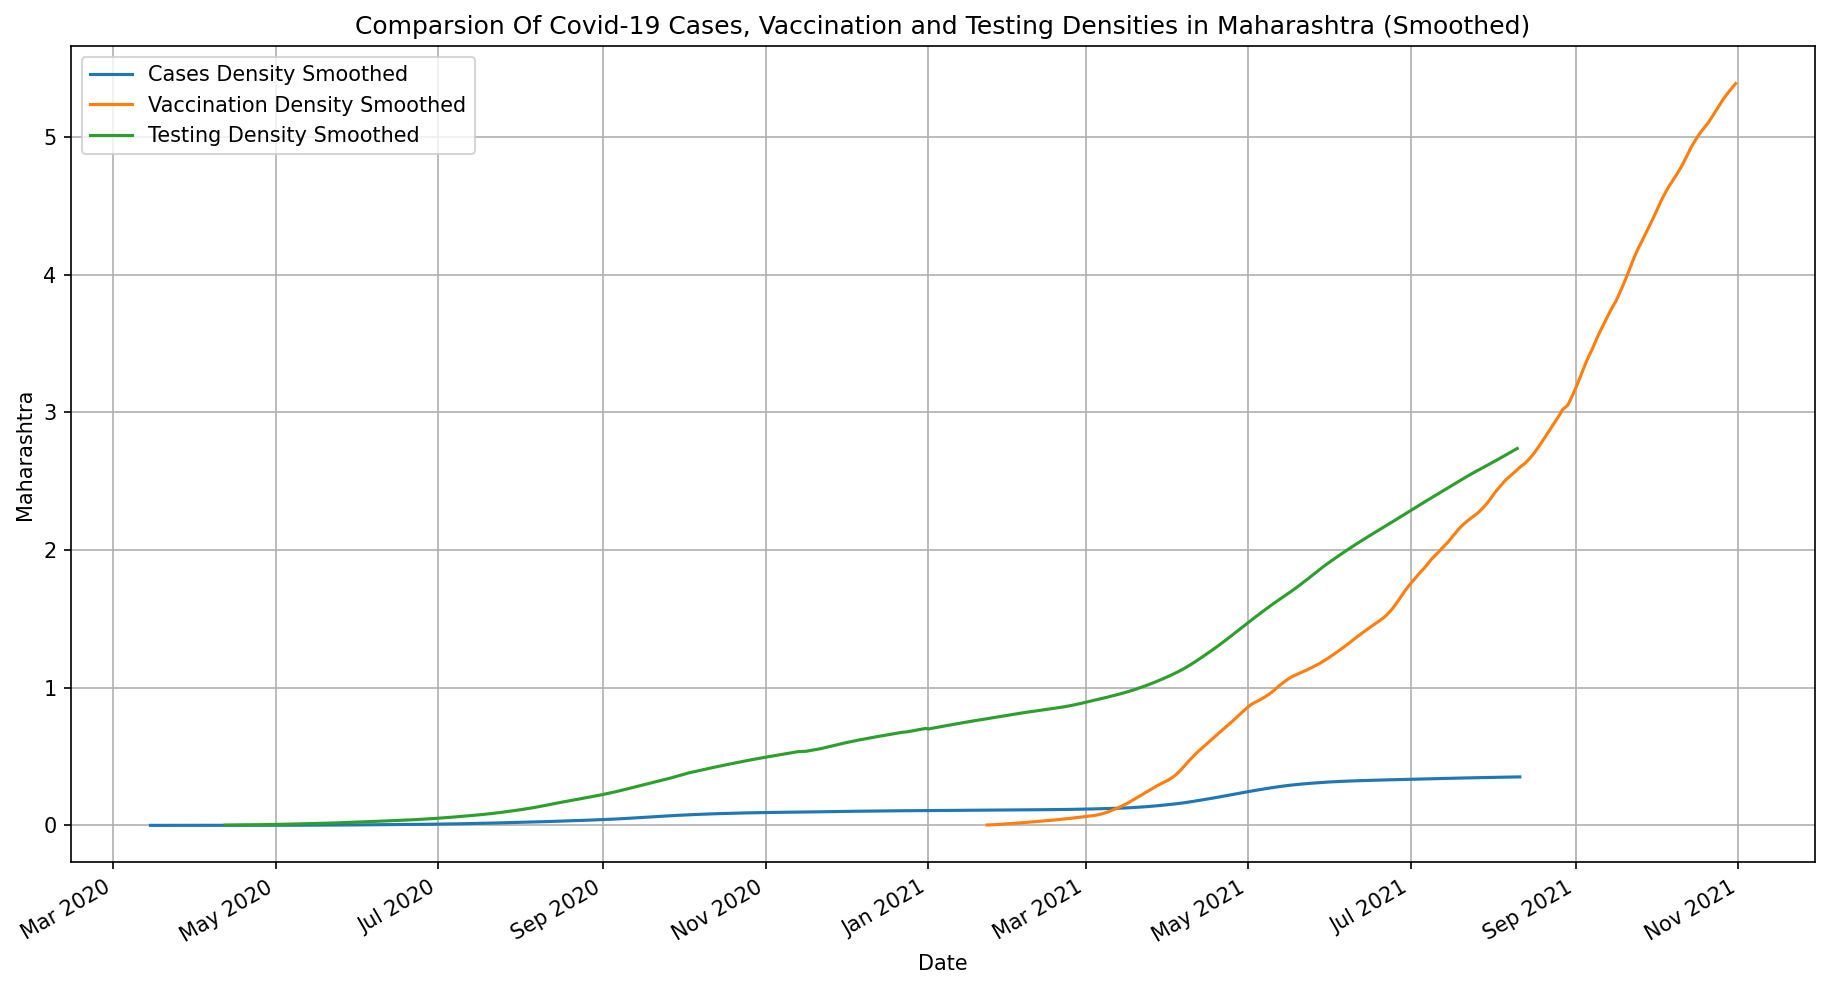

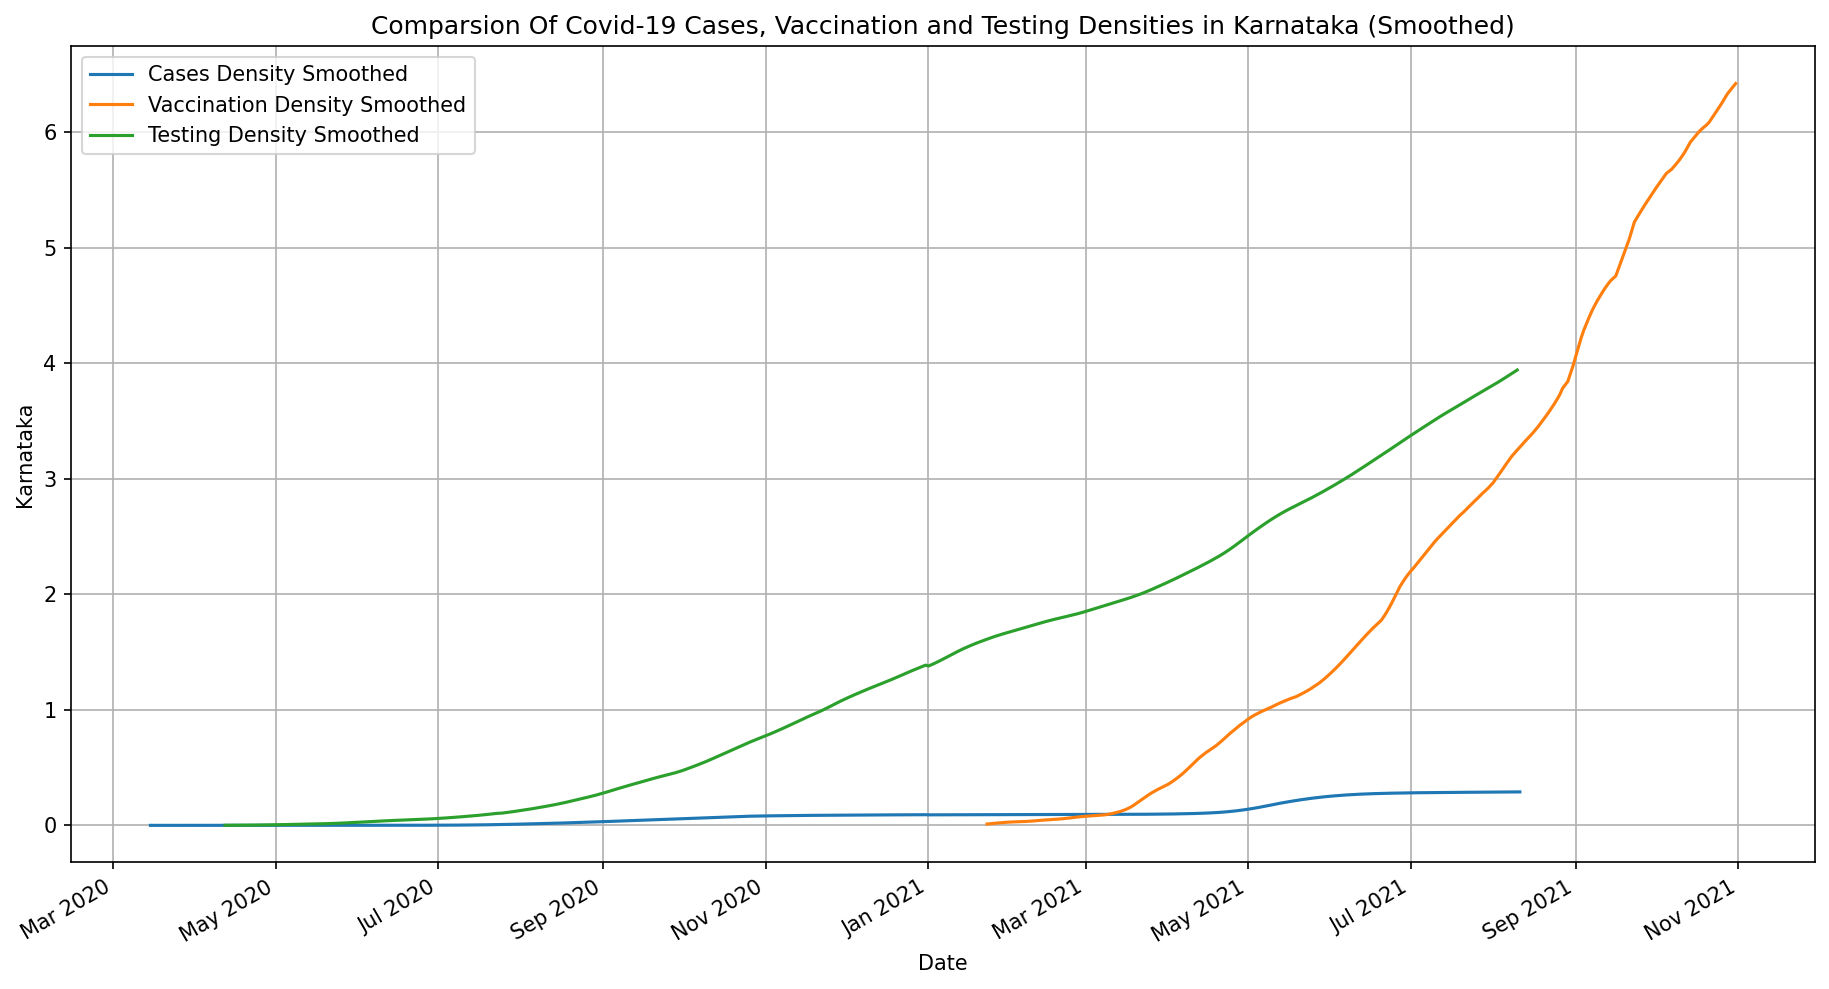

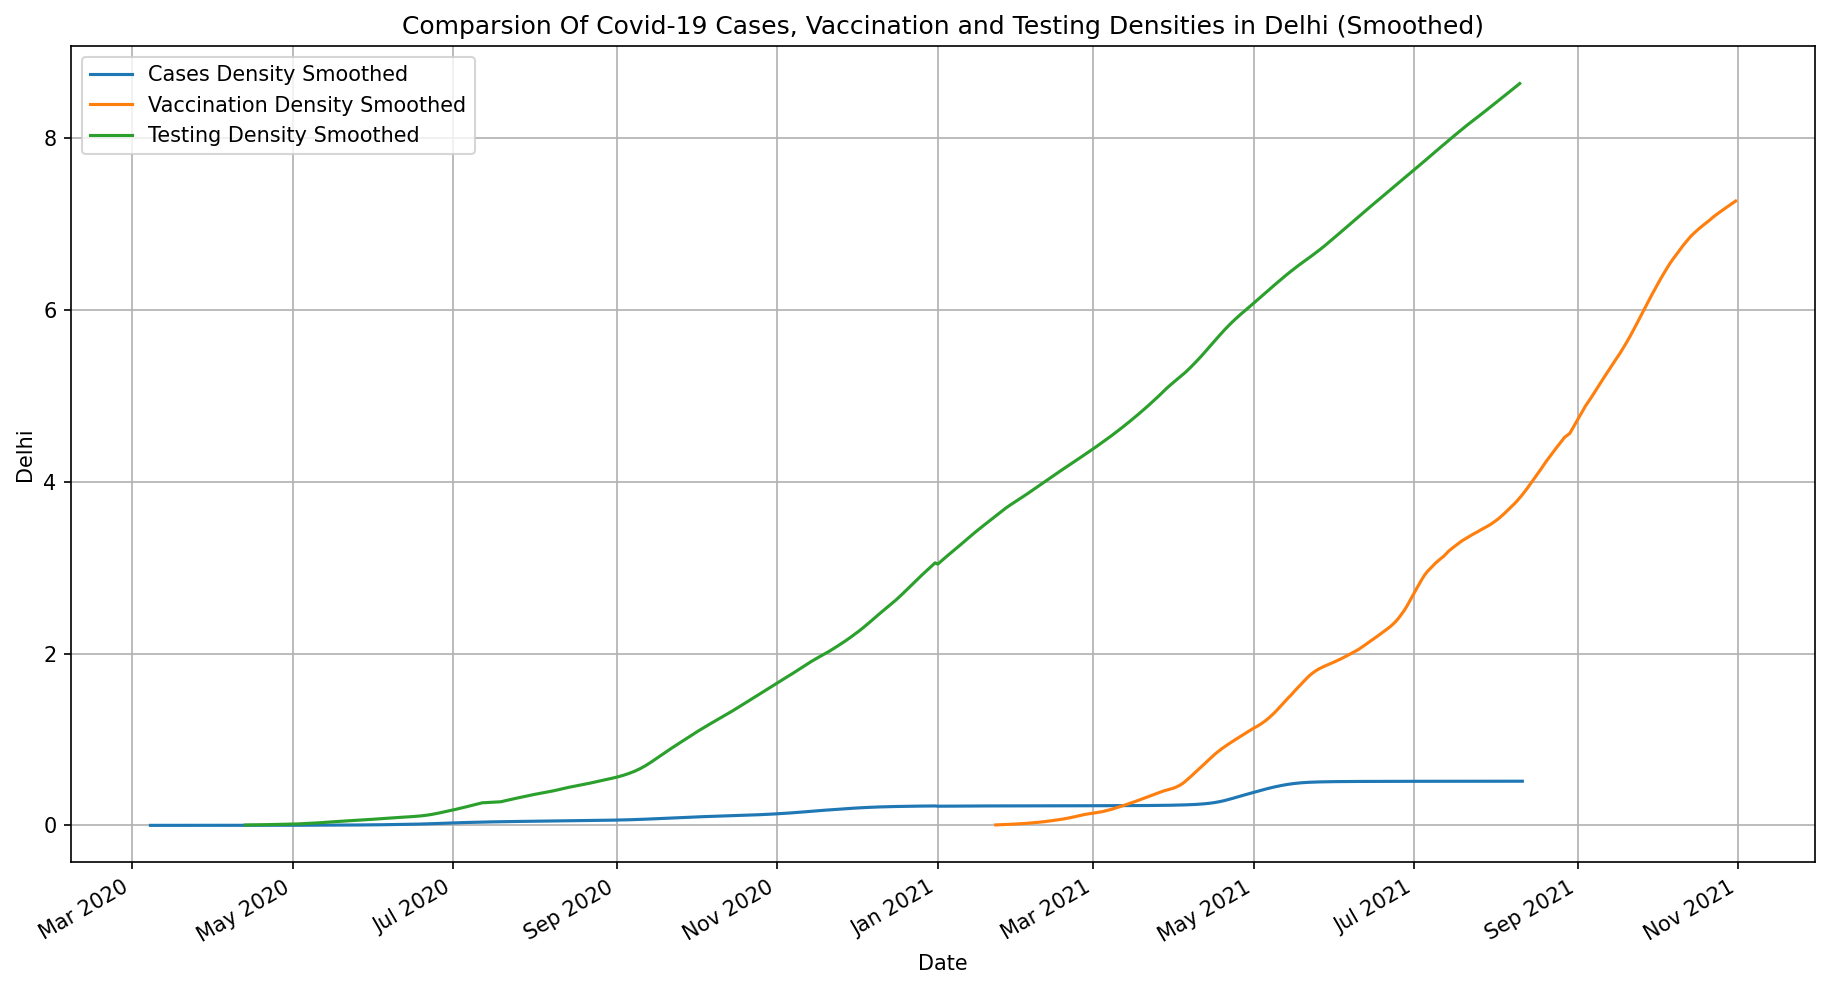

In [48]:
for i in population_dict:
    plot_state_date(i)

In [49]:
def plot_state_date_org (state):
    temp_state = state_case_data.loc[state_case_data['State'].isin([state])].copy()
    temp_vacc = state_vaccine_data.loc[state_vaccine_data['State'].isin([state])].copy()
    temp_test = state_test_data.loc[state_test_data['State'].isin([state])].copy()

    # before plotting we need to clear some data also
    # Start at the last column and subtract from the previous
    index_lst = list(temp_state.index)
    # for i in range(len(index_lst)-1,0,-1):
    #     curr_ind = index_lst[i]
    #     prev_ind = index_lst[i-1]
    #     temp_state.loc[curr_ind,"Confirmed"] = temp_state.loc[curr_ind,"Confirmed"] - temp_state.loc[prev_ind,"Confirmed"]

    # Doing the same for vaccination
    index_lst = list(temp_vacc.index)
    # for i in range(len(index_lst)-1,0,-1):
    #     curr_ind = index_lst[i]
    #     prev_ind = index_lst[i-1]
    #     temp_vacc.loc[curr_ind,"Total Doses Administered"] = temp_vacc.loc[curr_ind,"Total Doses Administered"] - temp_vacc.loc[prev_ind,"Total Doses Administered"]

    # Doing the same for testing
    index_lst = list(temp_test.index)
    # for i in range(len(index_lst)-1,0,-1):
    #     curr_ind = index_lst[i]
    #     prev_ind = index_lst[i-1]
    #     temp_test.loc[curr_ind,"TotalSamples"] = temp_test.loc[curr_ind,"TotalSamples"] - temp_test.loc[prev_ind,"TotalSamples"]

    # Smoothing out the cases
    temp_state["case_smooth"] = temp_state["Confirmed"]
    temp_vacc["vacc_smooth"] = temp_vacc["Total Doses Administered"]
    temp_test["test_smooth"] = temp_test["TotalSamples"]

    # Normalising by population
    temp_state["case_density"] = temp_state["case_smooth"].div(temp_state["Population"])
    temp_test["test_density"] = temp_test["test_smooth"].div(temp_test["Population"])
    temp_vacc["vaccine_density"] = temp_vacc["vacc_smooth"].div(temp_vacc["Population"])

    fig, ax = plt.subplots(figsize=(15,8), dpi=150)
    ax.plot(temp_state["Date"], temp_state["case_density"].mul(1), label = "Cases Density")
    ax.plot(temp_vacc["Date"], temp_vacc["vaccine_density"], label ="Vaccination Density")
    ax.plot(temp_test["Date"], temp_test["test_density"], label = "Testing Density")
    ax.legend()
    ax.grid(True)
    plt.gcf().autofmt_xdate()
    date_form = DateFormatter("%b %Y")
    ax.xaxis.set_major_formatter(date_form)
    plt.xlabel("Date")
    plt.ylabel(state)
    plt.title("Comparsion Of Covid-19 Cases, Vaccination and Testing Densities in "+ state +" (Non-Smoothed)")
    plt.show()
    if (state == "Delhi"):
        return temp_test

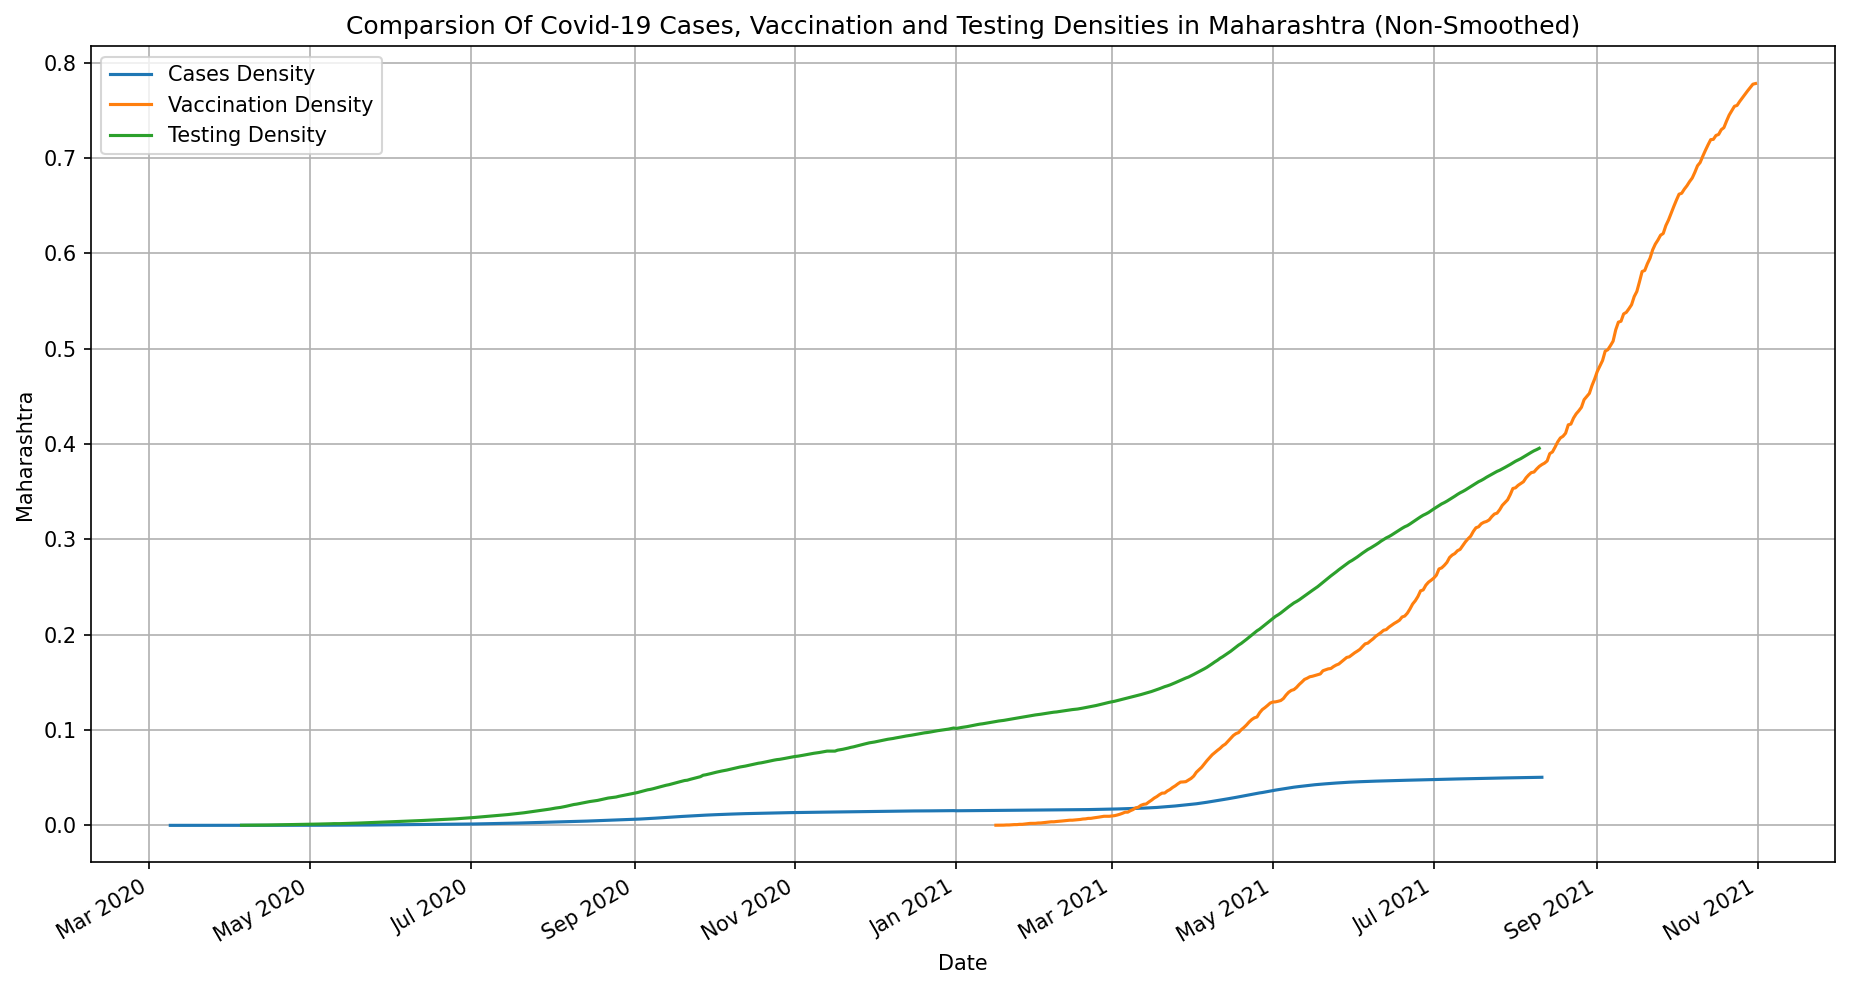

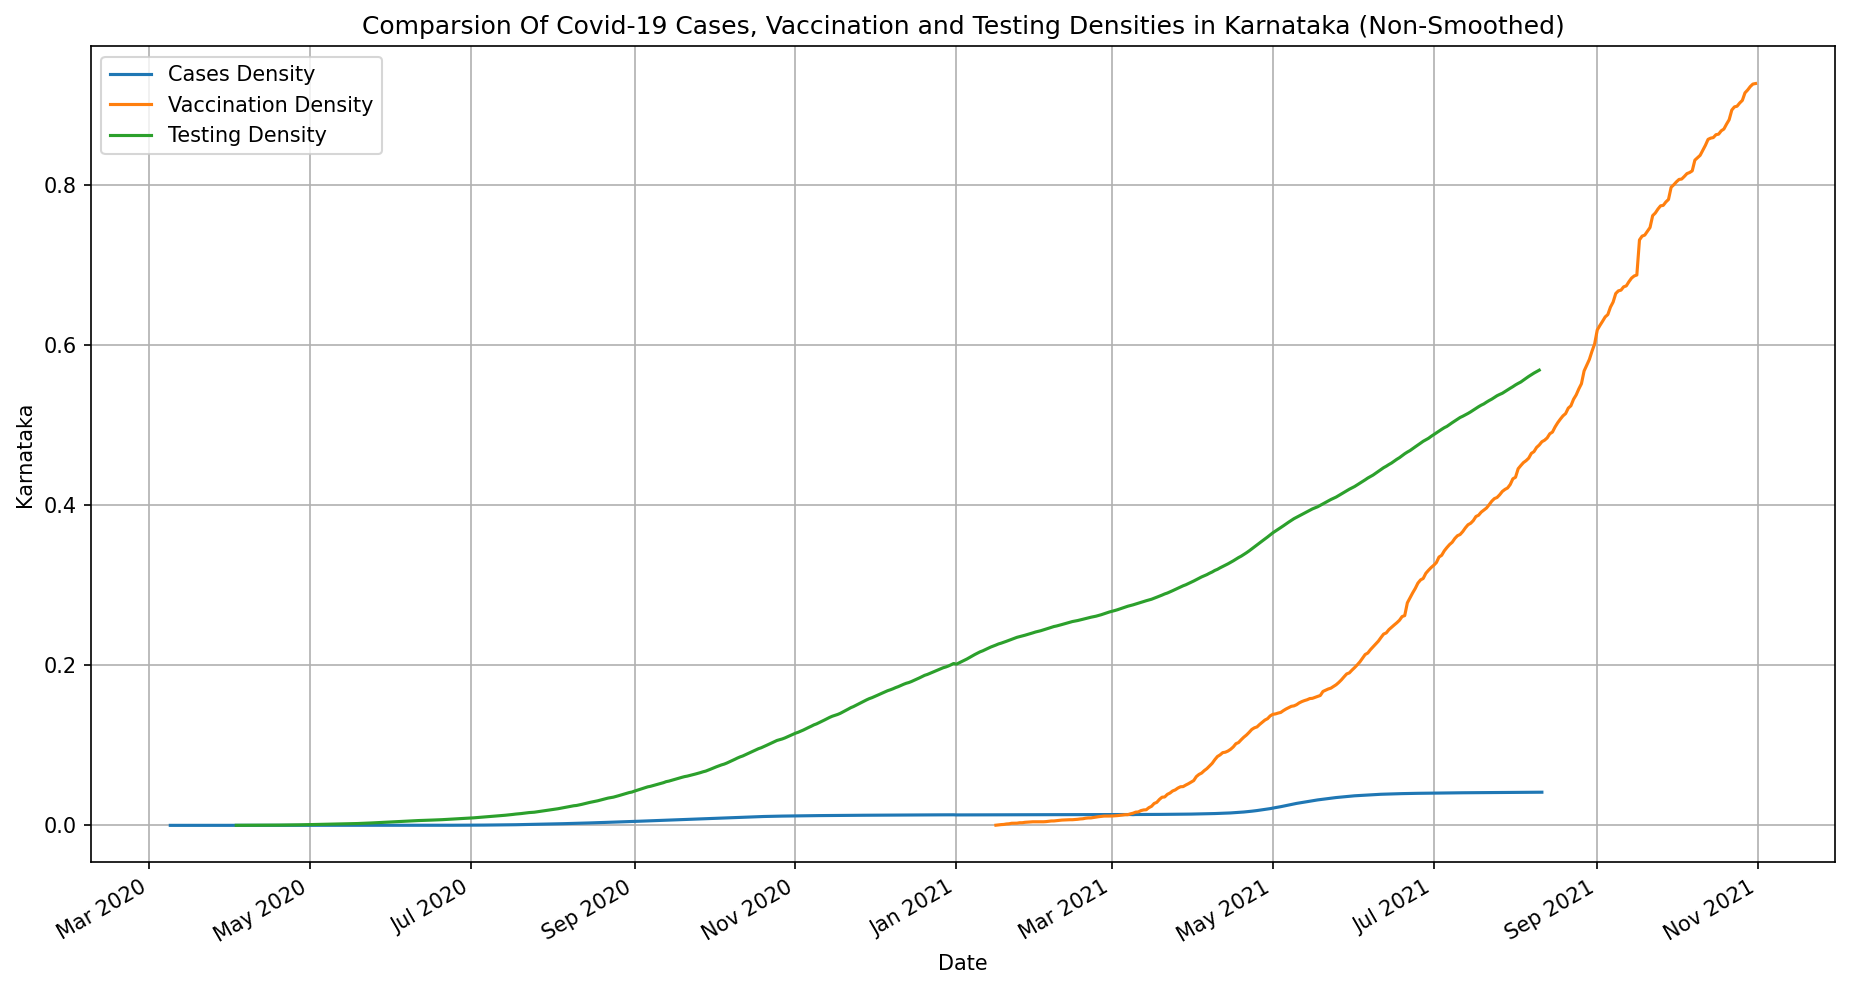

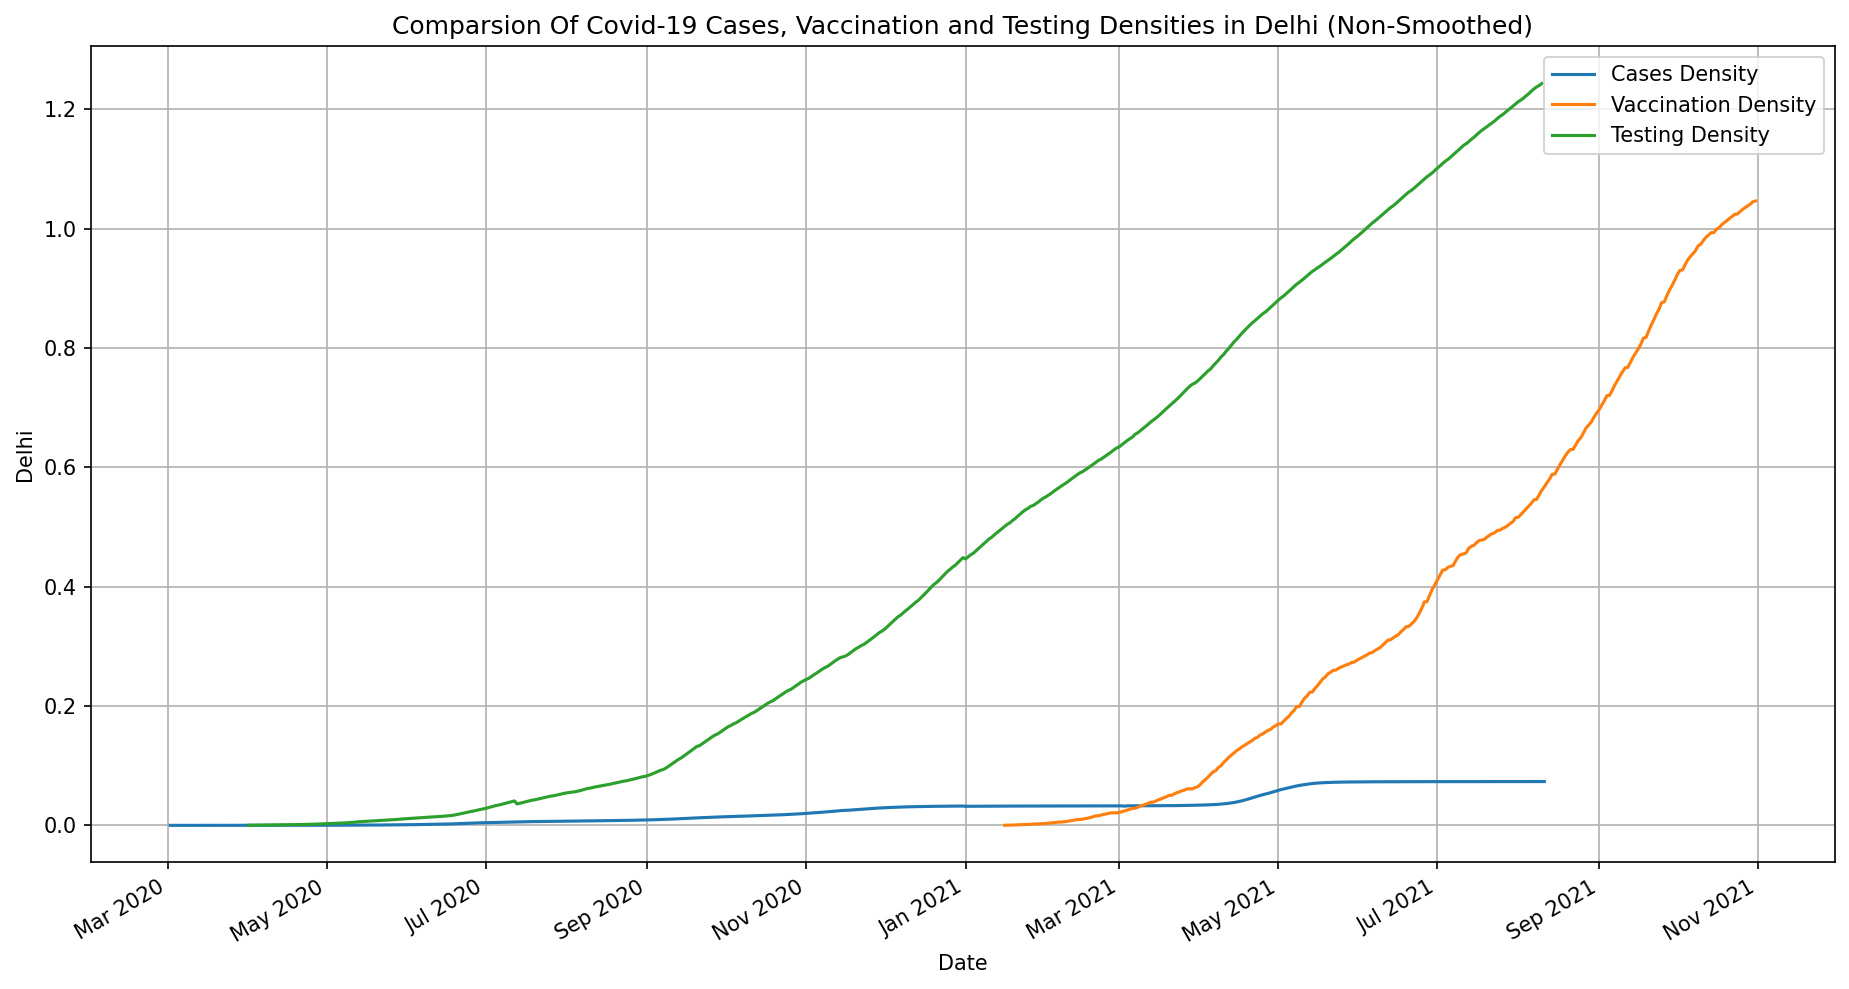

In [50]:
for i in population_dict:
    plot_state_date_org(i)

In [52]:
def plot_state_date_all (state_list):
    num_states = len(state_list)
    fig, ax = plt.subplots(num_states, 1, figsize=(15,15), dpi=150)
    i = 0
    str_ = ""
    for state in state_list:
        str_ = str_ +" "+ state + ","
    fig.suptitle("Comparsion Of Covid-19 Cases, Vaccination and Testing Densities in"+ str_[:-1] +" (Smoothed)", fontsize=16)
    for state in state_list:
        temp_state = state_case_data.loc[state_case_data['State'].isin([state])].copy()
        temp_vacc = state_vaccine_data.loc[state_vaccine_data['State'].isin([state])].copy()
        temp_test = state_test_data.loc[state_test_data['State'].isin([state])].copy()

        # Smoothing out the cases
        temp_state["case_smooth"] = temp_state["Confirmed"].rolling(7).sum()
        temp_vacc["vacc_smooth"] = temp_vacc["Total Doses Administered"].rolling(7).sum()
        temp_test["test_smooth"] = temp_test["TotalSamples"].rolling(7).sum()

        # Normalising by population
        temp_state["case_density"] = temp_state["case_smooth"].div(temp_state["Population"])
        temp_test["test_density"] = temp_test["test_smooth"].div(temp_test["Population"])
        temp_vacc["vaccine_density"] = temp_vacc["vacc_smooth"].div(temp_vacc["Population"])

        # Plotting
        ax[i].plot(temp_state["Date"], temp_state["case_density"].mul(1), label = "Cases Density Smoothed")
        ax[i].plot(temp_vacc["Date"], temp_vacc["vaccine_density"], label ="Vaccination Density Smoothed")
        ax[i].plot(temp_test["Date"], temp_test["test_density"], label = "Testing Density Smoothed")
        ax[i].legend()
        ax[i].grid(True)
        plt.gcf().autofmt_xdate()
        date_form = DateFormatter("%b %Y")
        ax[i].xaxis.set_major_formatter(date_form)
        ax[i].set_xlabel("Month-Year",fontsize=13)
        ax[i].set_ylabel(state, fontsize=13)
        i += 1
    fig.tight_layout()
    plt.show()
    # fig, ax = plt.subplots(figsize=(15,8), dpi=150)
    

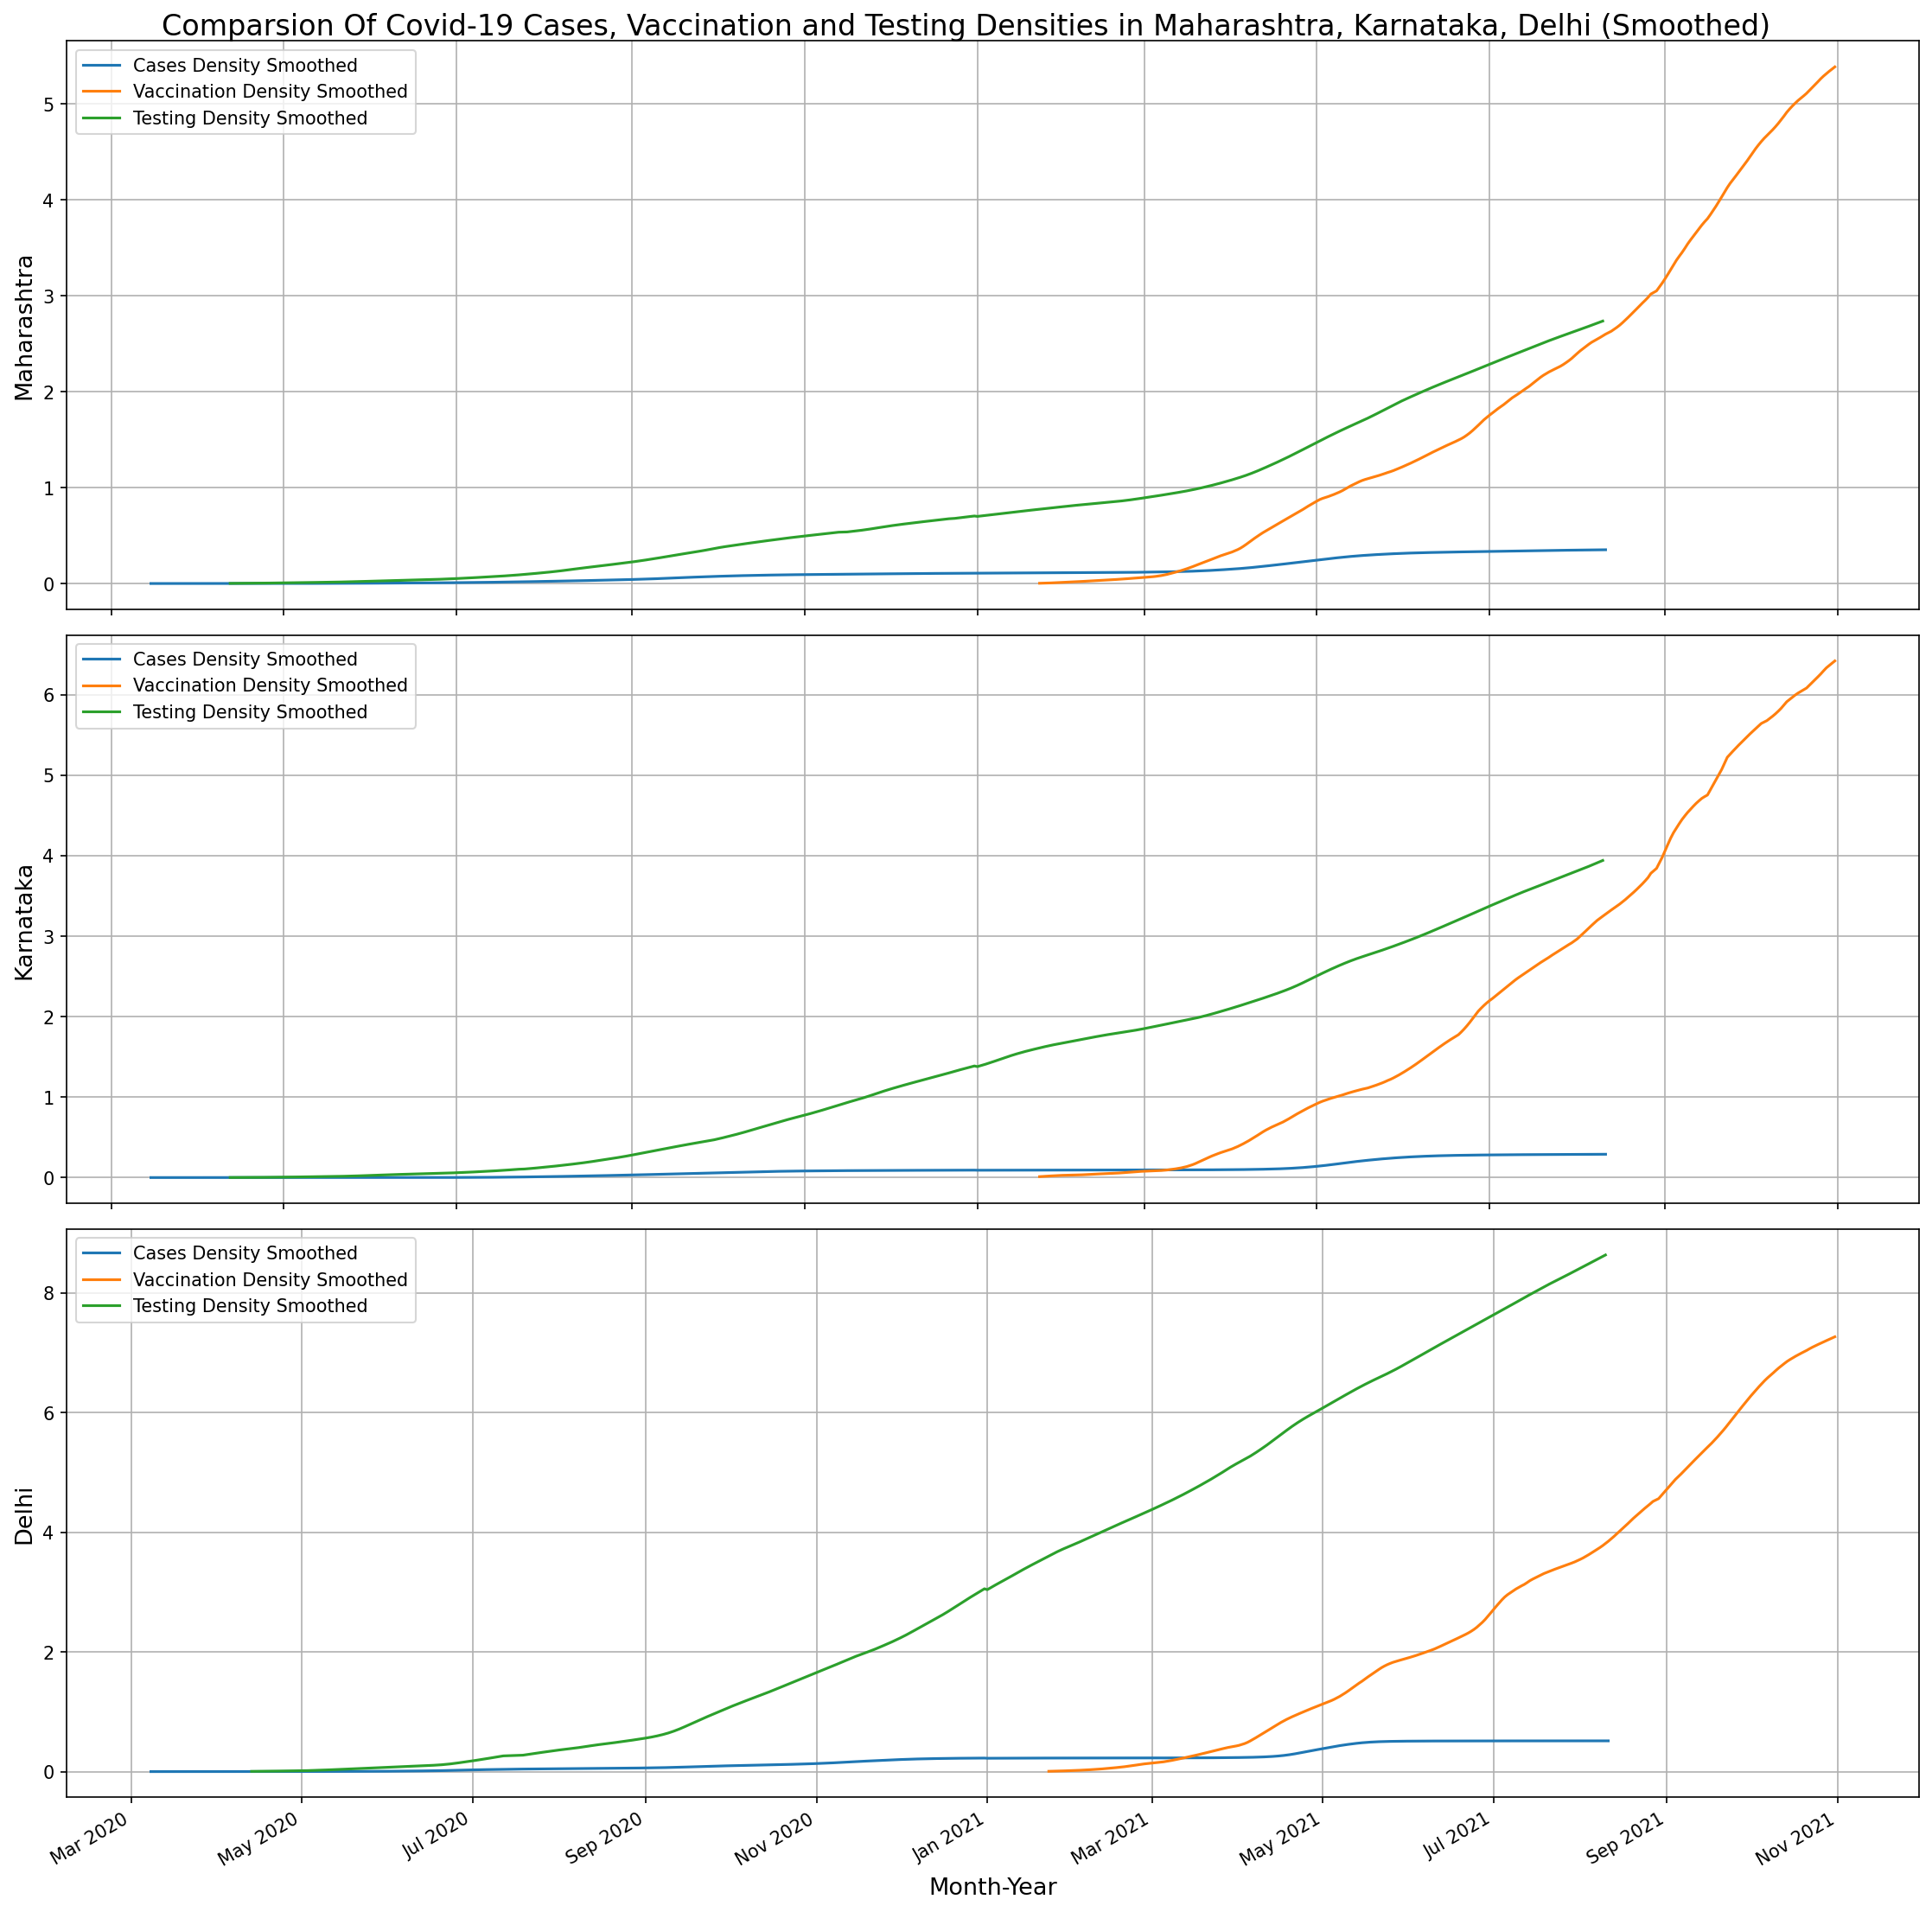

In [53]:
plot_state_date_all(population_dict.keys())